# Classification on Banking Data set


## Objectives

Goals for this project  :

* Does the report include a section describing the data?
* Does the report include a paragraph detailing the main objective(s) of this analysis?  
* Does the report include a section with variations of classifier models and specifies which one is the model that best suits the main objective(s) of this analysis?
* Does the report include a clear and well presented section with key findings related to the main objective(s) of the analysis?
* Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques? 

## **Brief Desription about the data**

There has been a revenue decline in the Portuguese Bank and they would like to know what actions to take. After investigation, they found that the root cause was that their customers are not investing enough for long term deposits. So the bank would like to identify existing customers that have a higher chance to subscribe for a long term deposit and focus marketing efforts on such customers.


### **Data Set Information**

The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be subscribed ('yes') or not ('no') subscribed.

There are two datasets: train.csv with all examples (32950) and 21 inputs including the target feature, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]

test.csv which is the test data that consists of 8238 observations and 20 features without the target feature

Goal:- The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

The dataset contains train and test data. Features of train data are listed below. And the test data have already been preprocessed.

* age	numeric	age of a person
* job	Categorical,nominal	type of job ('admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* marital	categorical,nominal	marital status ('divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* education	categorical,nominal ('basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* default	categorical,nominal	has credit in default? ('no','yes','unknown')
* housing	categorical,nominal	has housing loan? ('no','yes','unknown')
* loan	categorical,nominal	has personal loan? ('no','yes','unknown')
* contact	categorical,nominal	contact communication type ('cellular','telephone')
* month	categorical,ordinal	last contact month of year ('jan', 'feb', 'mar', …, 'nov', 'dec')
* day_of_week	categorical,ordinal	last contact day of the week ('mon','tue','wed','thu','fri')
* duration	numeric	last contact duration, in seconds . Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no')
* campaign	numeric	number of contacts performed during this campaign and for this client (includes last contact)
* pdays	numeric	number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)
* previous	numeric	number of contacts performed before this campaign and for this client
* poutcome	categorical,nominal	outcome of the previous marketing campaign ('failure','nonexistent','success')

### Target Variable
* y	binary	has the client subscribed a term deposit? ('yes','no')

## Main Objective

Main objective of this notebook is to be able to identify from the pool of existing customers of the commertial bank if a customer would subscribe for a long term deposit. So our target varible being Y is what needs to be predicted

So this would a be a classification problem and we will be using different classification models to predict.

Before fitting the model we would be doing a detail analysis of the feature varibles trying to identify which variables have more effect in identifying customers going for long term deposit and utilize those features to give us a better model.

#### Loading the data

In [244]:
import warnings 
warnings.filterwarnings('ignore')

In [245]:
!pip install imblearn

In [246]:
# import skillsnetwork
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import norm
from scipy import stats

import plotly.express as px
import ipywidgets as widgets
from IPython.display import display


from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score
%matplotlib inline


from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, confusion_matrix, plot_confusion_matrix, precision_score, recall_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# from imblearn.under_sampling import RandomUnderSampler
from sklearn import metrics
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from collections import Counter

from sklearn.svm import SVC

import lime.lime_tabular

In [247]:
bank = pd.read_csv('data/new_train.csv', sep=',')

bank.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
5,29,admin.,single,university.degree,no,no,no,cellular,aug,wed,256,2,999,0,nonexistent,no
6,26,student,single,basic.9y,no,no,no,telephone,aug,wed,449,1,999,0,nonexistent,yes
7,30,blue-collar,married,basic.4y,no,yes,no,cellular,nov,wed,126,2,999,0,nonexistent,no
8,50,blue-collar,married,basic.4y,unknown,no,no,telephone,may,fri,574,1,999,0,nonexistent,no
9,33,admin.,single,high.school,no,yes,no,cellular,jul,tue,498,5,999,0,nonexistent,no


In [248]:
bank_test = pd.read_csv('data/new_test.csv', sep=',')

bank_test.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome
0,32,4,0,6,0,0,0,0,3,3,131,5,1
1,37,10,3,6,0,0,0,0,4,3,100,1,1
2,55,5,0,5,1,2,0,0,3,2,131,2,1
3,44,2,1,0,1,0,0,1,4,3,48,2,1
4,28,0,2,3,0,0,0,0,5,0,144,2,1
5,45,10,1,2,0,0,0,0,1,0,126,3,1
6,55,0,0,6,0,0,0,0,7,0,189,1,1
7,46,0,1,3,0,0,0,1,4,3,107,3,1
8,53,1,2,2,0,2,0,0,3,4,355,1,1
9,30,0,2,6,0,0,0,0,1,1,135,1,1


In [249]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
age            32950 non-null int64
job            32950 non-null object
marital        32950 non-null object
education      32950 non-null object
default        32950 non-null object
housing        32950 non-null object
loan           32950 non-null object
contact        32950 non-null object
month          32950 non-null object
day_of_week    32950 non-null object
duration       32950 non-null int64
campaign       32950 non-null int64
pdays          32950 non-null int64
previous       32950 non-null int64
poutcome       32950 non-null object
y              32950 non-null object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [250]:
bank.describe()

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


## EDA and Feature Engineering

In [251]:
bank.isna().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

there are no null values in the data set

#### y variable transformation

In [252]:
bank['y'] = bank['y'].replace({'no': 0, 'yes': 1})

### 1. age

In [253]:
df_zero = bank[bank['y'] == 0]  # Subset with column values equal to 0
df_one = bank[bank['y'] == 1]   # Subset with column values equal to 1

In [254]:
df_zero.age.mean()

39.90782543265613

In [255]:
df_one.age.mean()

40.85129310344828

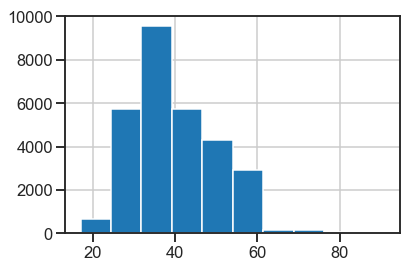

In [256]:
df_zero.age.hist(bins = 10)

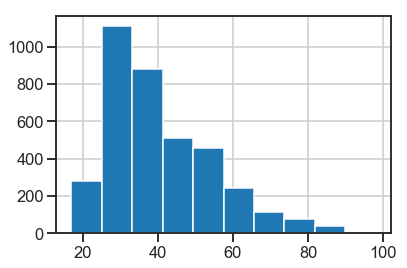

In [257]:
df_one.age.hist(bins = 10)

bining age into groups to see if there is a certain age group that has more tendency to go for long term plans

In [258]:
# Assuming you have a dataframe named "df" with an 'age' column
age_bins = [0, 20, 40, 60, float('inf')]
age_labels = ['0_20', '20_40', '40_60', '60andabove']
bank['age_group'] = pd.cut(bank['age'], bins=age_bins, labels=age_labels, right=False)

In [259]:
# Calculate cross-tabulation with percentages
cross_tab = pd.crosstab(bank['age_group'], bank['y'], normalize='index') * 100

# Format and color-code the cross-tab
cross_tab_styled = cross_tab.style.background_gradient(cmap='RdYlGn', axis=1)

# Display the styled cross-tab
print(cross_tab_styled)

In [260]:
print(cross_tab)

y                   0          1
age_group                       
0_20        58.064516  41.935484
20_40       88.420936  11.579064
40_60       91.205796   8.794204
60andabove  60.379347  39.620653


In [261]:
cross_tab.style.background_gradient(cmap='RdYlGn', axis=1)

y,0,1
age_group,,
0_20,58.0645,41.9355
20_40,88.4209,11.5791
40_60,91.2058,8.7942
60andabove,60.3793,39.6207


it can be observed from the above plot that people in the age groups 0 to 20 that means teen agers and 60 and above are more inclined towrads long term deposit compared to people not wanting to do long term deposits

In [262]:
# Calculate cross-tabulation with percentages
cross_tab = pd.crosstab(bank['age_group'], bank['y'], normalize='columns') * 100

# Format and color-code the cross-tab
cross_tab.style.background_gradient(cmap='RdYlGn', axis=0)


y,0,1
age_group,,
0_20,0.123127,0.700431
20_40,54.4292,56.1422
40_60,43.4879,33.028
60andabove,1.95978,10.1293


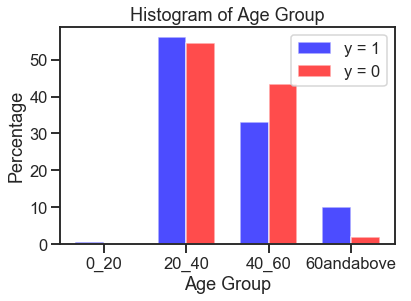

Dropdown(description='Plot type:', index=2, options=('Separate: 0', 'Separate: 1', 'Combined'), value='Combine…

In [263]:
# Assuming you have the cross-tabulation dataframe named "cross_tab" from the previous code

# Create a dropdown select widget
select_widget = widgets.Dropdown(options=['Separate: 0', 'Separate: 1', 'Combined'],
                                value='Combined',
                                description='Plot type:')

# Define a function to update the plot based on the dropdown selection
def update_plot(plot_type):
    if plot_type == 'Separate: 0':
        plt.figure(figsize=(6, 4))
        bar_width = 0.35
        x = np.arange(len(cross_tab))
        plt.bar(x + bar_width/2, cross_tab[0], width=bar_width, color='red', alpha=0.7, label='y = 0')
        plt.xlabel('Age Group')
        plt.title('Histogram of Age Group for y = 0')
        plt.ylabel('Percentage')
        plt.legend()
        plt.tight_layout()
        plt.show()
    
    elif plot_type == 'Separate: 1':
        plt.figure(figsize=(6, 4))
        bar_width = 0.35
        x = np.arange(len(cross_tab))
        plt.bar(x + bar_width/2, cross_tab[0], width=bar_width, color='blue', alpha=0.7, label='y = 1')
        plt.xlabel('Age Group')
        plt.title('Histogram of Age Group for y = 1')
        plt.ylabel('Percentage')
        plt.legend()
        plt.tight_layout()
        plt.show()
    
    else:  # Combined plot
        # Set the width of each bar
        bar_width = 0.35

        # Get the index positions for each age group
        x = np.arange(len(cross_tab))

        # Plotting the histograms side by side
        plt.bar(x - bar_width/2, cross_tab[1], width=bar_width, color='blue', alpha=0.7, label='y = 1')
        plt.bar(x + bar_width/2, cross_tab[0], width=bar_width, color='red', alpha=0.7, label='y = 0')
        # Set plot labels and title
        plt.xlabel('Age Group')
        plt.ylabel('Percentage')
        plt.title('Histogram of Age Group')
        # Set the x-axis tick labels to be the age group labels
        plt.xticks(x, cross_tab.index)
        # Add legend
        plt.legend()
        # Display the histogram plot
        plt.show()
        # Display the dropdown select widget
        display(select_widget)

# Call the update_plot function with the initial value
update_plot(select_widget.value)

# Define a function to handle the dropdown select widget's value change
def on_select_change(change):
    update_plot(change.new)

# Set up the event listener for the dropdown select widget
select_widget.observe(on_select_change, names='value')

In [264]:
from IPython.display import display

In [265]:
# # Create a dropdown select widget
# select_widget = widgets.Dropdown(options=['Separate: 0', 'Separate: 1', 'Combined'],
#                                 value='Combined',
#                                 description='Plot type:')

# # Create a figure and axes objects
# fig, ax = plt.subplots(figsize=(6, 4))

# # Define a function to update the plot based on the dropdown selection
# def update_plot(plot_type):
#     ax.clear()  # Clear the previous plot
    
#     if plot_type == 'Separate: 0':
#         ax.bar(cross_tab.index, cross_tab[0], color='red', alpha=0.7, label='y = 0')
#         ax.set_xlabel('Age Group')
#         ax.set_title('Histogram of Age Group for y = 0')
#         ax.set_ylabel('Percentage')
#         ax.legend()
    
#     elif plot_type == 'Separate: 1':
#         ax.bar(cross_tab.index, cross_tab[1], color='green', alpha=0.7, label='y = 1')
#         ax.set_xlabel('Age Group')
#         ax.set_title('Histogram of Age Group for y = 1')
#         ax.set_ylabel('Percentage')
#         ax.legend()
    
#     else:  # Combined plot
#         ax.bar(cross_tab.index, cross_tab[0], color='red', alpha=0.7, label='y = 0')
#         ax.bar(cross_tab.index, cross_tab[1], color='green', alpha=0.7, label='y = 1')
#         ax.set_xlabel('Age Group')
#         ax.set_title('Histogram of Age Group (Combined)')
#         ax.set_ylabel('Percentage')
#         ax.legend()
    
#     fig.canvas.draw()
# #     plt.tight_layout()
# #     display(fig)

# # Display the dropdown select widget
# display(select_widget)

# # Call the update_plot function with the initial value
# update_plot(select_widget.value)

# # Define a function to handle the dropdown select widget's value change
# def on_select_change(change):
#     update_plot(change.new)

# # Set up the event listener for the dropdown select widget
# select_widget.observe(on_select_change, names='value')

 with in people wanting to go for long term deposits working class people that is from the age of 20-60 are the ones going for long term deposits, this makes sense as these are the people that usually have the modeny to deposit

In [266]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 17 columns):
age            32950 non-null int64
job            32950 non-null object
marital        32950 non-null object
education      32950 non-null object
default        32950 non-null object
housing        32950 non-null object
loan           32950 non-null object
contact        32950 non-null object
month          32950 non-null object
day_of_week    32950 non-null object
duration       32950 non-null int64
campaign       32950 non-null int64
pdays          32950 non-null int64
previous       32950 non-null int64
poutcome       32950 non-null object
y              32950 non-null int64
age_group      32950 non-null category
dtypes: category(1), int64(6), object(10)
memory usage: 4.1+ MB


### 2. Job

In [267]:
bank.job.unique()

array(['blue-collar', 'entrepreneur', 'retired', 'admin.', 'student',
       'services', 'technician', 'self-employed', 'management',
       'unemployed', 'unknown', 'housemaid'], dtype=object)

In [268]:
# Calculate cross-tabulation with percentages
cross_tab_job = pd.crosstab(bank['job'], bank['y'], normalize='columns') * 100

# Format and color-code the cross-tab
cross_tab_job.style.background_gradient(cmap='RdYlGn', axis=0)


y,0,1
job,,
admin.,24.776,28.8254
blue-collar,23.6884,13.8739
entrepreneur,3.62542,2.69397
housemaid,2.63014,2.31681
management,7.10035,7.24677
retired,3.48177,9.375
self-employed,3.3518,3.20582
services,10.0622,6.84267
student,1.68958,5.84591


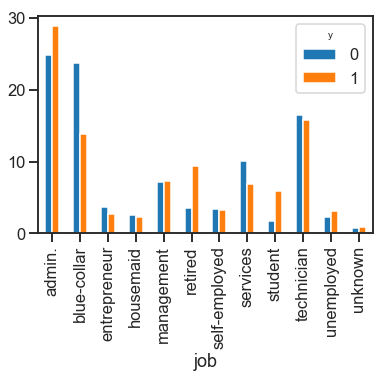

In [269]:
cross_tab_job.plot(kind = 'bar', stacked = False)

most of the people willing to make long term deposits are from admin, technician, blue-collar these are usually low paying jobs with low job security

similarly these are also the jobs where people belong to who donot want to make long term deposits

In [270]:
# Calculate cross-tabulation with percentages
cross_tab_job_ind = pd.crosstab(bank['job'], bank['y'], normalize='index') * 100

# Format and color-code the cross-tab
cross_tab_job_ind.style.background_gradient(cmap='RdYlGn', axis=0)


y,0,1
job,,
admin.,87.1301,12.8699
blue-collar,93.0789,6.92111
entrepreneur,91.3793,8.62069
housemaid,89.9415,10.0585
management,88.5288,11.4712
retired,74.5242,25.4758
self-employed,89.172,10.828
services,92.0526,7.94743
student,69.4796,30.5204


what we can do is one hot encode these job profiles and then see which of these job profiles are more important

#### one hot encoding job

In [271]:
bank_1 = bank.copy()

In [272]:
# Perform one-hot encoding using pandas.get_dummies()
one_hot_encoded = pd.get_dummies(bank['job'], prefix='job')

# Concatenate the one-hot encoded columns with the original DataFrame
bank = pd.concat([bank, one_hot_encoded], axis=1)

# Drop the original 'job' column
# bank.drop('job', axis=1, inplace=True)

# Print the encoded DataFrame
display(bank)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,...,0,0,0,0,0,0,0,0,0,0
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,...,1,0,0,0,0,0,0,0,0,0
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,...,0,0,0,1,0,0,0,0,0,0
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,...,0,0,0,0,0,0,0,0,0,0
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,...,0,0,0,1,0,0,0,0,0,0
5,29,admin.,single,university.degree,no,no,no,cellular,aug,wed,...,0,0,0,0,0,0,0,0,0,0
6,26,student,single,basic.9y,no,no,no,telephone,aug,wed,...,0,0,0,0,0,0,1,0,0,0
7,30,blue-collar,married,basic.4y,no,yes,no,cellular,nov,wed,...,0,0,0,0,0,0,0,0,0,0
8,50,blue-collar,married,basic.4y,unknown,no,no,telephone,may,fri,...,0,0,0,0,0,0,0,0,0,0
9,33,admin.,single,high.school,no,yes,no,cellular,jul,tue,...,0,0,0,0,0,0,0,0,0,0


In [273]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 29 columns):
age                  32950 non-null int64
job                  32950 non-null object
marital              32950 non-null object
education            32950 non-null object
default              32950 non-null object
housing              32950 non-null object
loan                 32950 non-null object
contact              32950 non-null object
month                32950 non-null object
day_of_week          32950 non-null object
duration             32950 non-null int64
campaign             32950 non-null int64
pdays                32950 non-null int64
previous             32950 non-null int64
poutcome             32950 non-null object
y                    32950 non-null int64
age_group            32950 non-null category
job_admin.           32950 non-null uint8
job_blue-collar      32950 non-null uint8
job_entrepreneur     32950 non-null uint8
job_housemaid        32950 non-null ui

### 3. Maritial

In [274]:
bank.marital.unique()

array(['married', 'divorced', 'single', 'unknown'], dtype=object)

In [275]:
# Calculate cross-tabulation with percentages
cross_tab_marital = pd.crosstab(bank['marital'], bank['y'], normalize='columns') * 100

# Format and color-code the cross-tab
cross_tab_marital.style.background_gradient(cmap='RdYlGn', axis=0)


y,0,1
marital,,
divorced,11.3004,9.99461
married,61.3346,54.4181
single,27.1804,35.2909
unknown,0.184691,0.296336


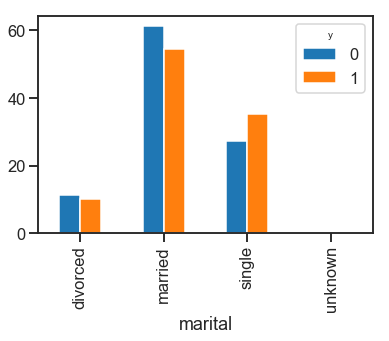

In [276]:
cross_tab_marital.plot(kind = 'bar', stacked = False)

it looks like divorced people have the least tendency to do long term deposits, where as married followed by single have the most tendency to make long term deposits

In [277]:
# Calculate cross-tabulation with percentages
cross_tab_marital_index = pd.crosstab(bank['marital'], bank['y'], normalize='index') * 100

# Format and color-code the cross-tab
cross_tab_marital_index.style.background_gradient(cmap='RdYlGn', axis=0)


y,0,1
marital,,
divorced,89.9048,10.0952
married,89.8762,10.1238
single,85.8485,14.1515
unknown,83.0769,16.9231


#### one hot encoding marital

In [278]:
bank_2 = bank.copy()

In [279]:
# bank = bank_2

In [280]:
# Perform one-hot encoding using pandas.get_dummies()
one_hot_encoded = pd.get_dummies(bank['marital'], prefix='marital')

# Concatenate the one-hot encoded columns with the original DataFrame
bank = pd.concat([bank, one_hot_encoded], axis=1)

# Drop the original 'job' column
# bank.drop('marital', axis=1, inplace=True)

# Print the encoded DataFrame
display(bank.head)


<bound method NDFrame.head of        age            job   marital            education  default  housing  \
0       49    blue-collar   married             basic.9y  unknown       no   
1       37   entrepreneur   married    university.degree       no       no   
2       78        retired   married             basic.4y       no       no   
3       36         admin.   married    university.degree       no      yes   
4       59        retired  divorced    university.degree       no       no   
5       29         admin.    single    university.degree       no       no   
6       26        student    single             basic.9y       no       no   
7       30    blue-collar   married             basic.4y       no      yes   
8       50    blue-collar   married             basic.4y  unknown       no   
9       33         admin.    single          high.school       no      yes   
10      44       services  divorced          high.school       no      yes   
11      32     technician   marrie

In [281]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 33 columns):
age                  32950 non-null int64
job                  32950 non-null object
marital              32950 non-null object
education            32950 non-null object
default              32950 non-null object
housing              32950 non-null object
loan                 32950 non-null object
contact              32950 non-null object
month                32950 non-null object
day_of_week          32950 non-null object
duration             32950 non-null int64
campaign             32950 non-null int64
pdays                32950 non-null int64
previous             32950 non-null int64
poutcome             32950 non-null object
y                    32950 non-null int64
age_group            32950 non-null category
job_admin.           32950 non-null uint8
job_blue-collar      32950 non-null uint8
job_entrepreneur     32950 non-null uint8
job_housemaid        32950 non-null ui

### 4. education

In [282]:
bank.education.unique()

array(['basic.9y', 'university.degree', 'basic.4y', 'high.school',
       'professional.course', 'unknown', 'basic.6y', 'illiterate'],
      dtype=object)

In [283]:
# Calculate cross-tabulation with percentages
cross_tab_education = pd.crosstab(bank['education'], bank['y'], normalize='columns') * 100

# Format and color-code the cross-tab
cross_tab_education.style.background_gradient(cmap='RdYlGn', axis=0)


y,0,1
education,,
basic.4y,10.1854,9.26724
basic.6y,5.84513,4.20259
basic.9y,15.2439,9.94073
high.school,23.1924,21.9558
illiterate,0.0444627,0.080819
professional.course,12.7197,12.7425
university.degree,28.699,36.2338
unknown,4.07005,5.57651


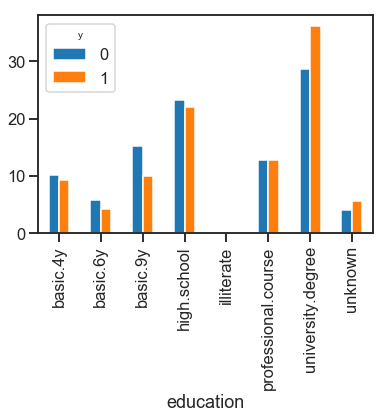

In [284]:
cross_tab_education.plot(kind = 'bar', stacked = False)

it can be observed from the above plot that mostly it university degree, profession degree and highschool people tend to be part of the banking system more and tend to also make long term deposits

whereas less educated people and illiterate people are less in the banking system

let's create a new group as education_category where university degree, professional course high school, as higher education
basic.4y, basic 6y, basic 9y as primary education
keep illiterate and unknown as is


In [285]:
bank_3 = bank.copy()

In [286]:
# Define the mapping for education groups
education_mapping = {
    'higher education': ['university.degree', 'professional.course', 'high.school'],
    'primary education': ['basic.4y', 'basic.6y', 'basic.9y']
}

# Function to map education categories to groups
def map_education_category(education):
    for group, categories in education_mapping.items():
        if education in categories:
            return group
    return education

# Create a new column with updated education groups
bank['education_group'] = bank['education'].apply(map_education_category)

In [287]:
# Calculate cross-tabulation with percentages
cross_tab_education_group = pd.crosstab(bank['education_group'], bank['y'], normalize='columns') * 100

# Format and color-code the cross-tab
cross_tab_education_group.style.background_gradient(cmap='RdYlGn', axis=0)


y,0,1
education_group,,
higher education,64.6111,70.9321
illiterate,0.0444627,0.080819
primary education,31.2744,23.4106
unknown,4.07005,5.57651


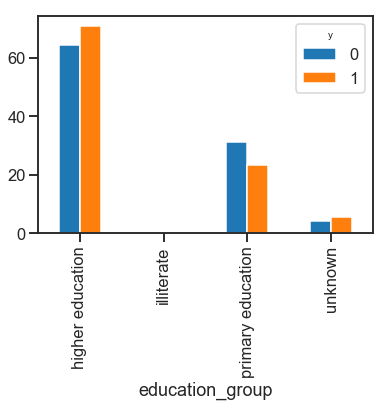

In [288]:
cross_tab_education_group.plot(kind = 'bar', stacked = False)

#### one hot encoding education_group

In [289]:
# Perform one-hot encoding using pandas.get_dummies()
one_hot_encoded = pd.get_dummies(bank['education_group'], prefix='education_group')

# Concatenate the one-hot encoded columns with the original DataFrame
bank = pd.concat([bank, one_hot_encoded], axis=1)

# Drop the original 'job' column
bank.drop('education_group', axis=1, inplace=True)

# Print the encoded DataFrame
bank.head


<bound method NDFrame.head of        age            job   marital            education  default  housing  \
0       49    blue-collar   married             basic.9y  unknown       no   
1       37   entrepreneur   married    university.degree       no       no   
2       78        retired   married             basic.4y       no       no   
3       36         admin.   married    university.degree       no      yes   
4       59        retired  divorced    university.degree       no       no   
5       29         admin.    single    university.degree       no       no   
6       26        student    single             basic.9y       no       no   
7       30    blue-collar   married             basic.4y       no      yes   
8       50    blue-collar   married             basic.4y  unknown       no   
9       33         admin.    single          high.school       no      yes   
10      44       services  divorced          high.school       no      yes   
11      32     technician   marrie

In [290]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 37 columns):
age                                  32950 non-null int64
job                                  32950 non-null object
marital                              32950 non-null object
education                            32950 non-null object
default                              32950 non-null object
housing                              32950 non-null object
loan                                 32950 non-null object
contact                              32950 non-null object
month                                32950 non-null object
day_of_week                          32950 non-null object
duration                             32950 non-null int64
campaign                             32950 non-null int64
pdays                                32950 non-null int64
previous                             32950 non-null int64
poutcome                             32950 non-null object
y          

### 5. default

In [291]:
bank.default.unique()

array(['unknown', 'no', 'yes'], dtype=object)

has credit default or not

In [292]:
# Calculate cross-tabulation with percentages
cross_tab_default = pd.crosstab(bank['default'], bank['y'], normalize='columns') * 100

# Format and color-code the cross-tab
cross_tab_default.style.background_gradient(cmap='RdYlGn', axis=0)


y,0,1
default,,
no,77.4882,90.2748
unknown,22.5015,9.72522
yes,0.0102606,0


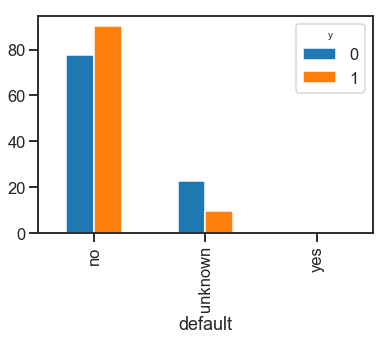

In [293]:
cross_tab_default.plot(kind = 'bar', stacked = False)

people who dont have creadit default are usually more, which makes sense, and they are also the one who mostly go for long term deposit. Which makes sense they are usually the ones who are capable of having more monetary security

#### let us label encode this column as no = 0, yea = 1 and unknown = -1

* lets look at the combine effect of education and default

In [294]:
cross_tab_edu_def = pd.crosstab(index=[bank['education'],bank['default']], columns=bank['y'], normalize = 'columns')

# Calculate the column sums
column_sums = cross_tab_edu_def.sum()

# Sort the cross-tabulation DataFrame by column sums in descending order
cross_tab_edu_def_sorted = cross_tab_edu_def[column_sums.sort_values(ascending=False).index]



# Format and color-code the cross-tab
cross_tab_edu_def_sorted.style.background_gradient(cmap='RdYlGn', axis=0)

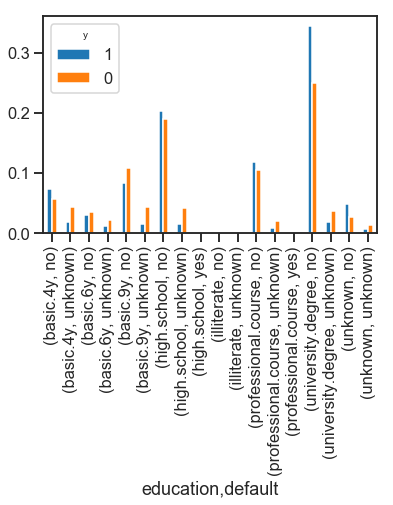

In [295]:
cross_tab_edu_def_sorted.plot(kind = 'bar', stacked = False)

there not much clear information to say anything conclusive, only thing we can see from here is that profession course and highschool degree holders tens to be creadit defaults

* lets look at job vs default as well

In [296]:
cross_tab_job_def = pd.crosstab(index=[bank['job'],bank['default']], columns=bank['y'], normalize = 'columns')

# Calculate the column sums
column_sums = cross_tab_job_def.sum()

# Sort the cross-tabulation DataFrame by column sums in descending order
cross_tab_job_def_sorted = cross_tab_job_def[column_sums.sort_values(ascending=False).index]



# Format and color-code the cross-tab
cross_tab_job_def_sorted.style.background_gradient(cmap='RdYlGn', axis=0)

similarly technicians and unemployed people tend to have more defaults

In [297]:
bank_4 = bank.copy()

In [298]:
# bank = bank_4

#### encoding default with no = 0, yes = 1 and unknown = -1

In [299]:
# Assuming 'bank' is the DataFrame containing the 'default' column
bank['default'] = bank['default'].replace({'yes': 1, 'no': 0, 'unknown': -1})

# Print the updated DataFrame
print(bank)

       age            job   marital            education  default  housing  \
0       49    blue-collar   married             basic.9y       -1       no   
1       37   entrepreneur   married    university.degree        0       no   
2       78        retired   married             basic.4y        0       no   
3       36         admin.   married    university.degree        0      yes   
4       59        retired  divorced    university.degree        0       no   
5       29         admin.    single    university.degree        0       no   
6       26        student    single             basic.9y        0       no   
7       30    blue-collar   married             basic.4y        0      yes   
8       50    blue-collar   married             basic.4y       -1       no   
9       33         admin.    single          high.school        0      yes   
10      44       services  divorced          high.school        0      yes   
11      32     technician   married    university.degree        

In [300]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 37 columns):
age                                  32950 non-null int64
job                                  32950 non-null object
marital                              32950 non-null object
education                            32950 non-null object
default                              32950 non-null int64
housing                              32950 non-null object
loan                                 32950 non-null object
contact                              32950 non-null object
month                                32950 non-null object
day_of_week                          32950 non-null object
duration                             32950 non-null int64
campaign                             32950 non-null int64
pdays                                32950 non-null int64
previous                             32950 non-null int64
poutcome                             32950 non-null object
y           

### 6. housing

In [301]:
bank.housing.unique()

array(['no', 'yes', 'unknown'], dtype=object)

has housing loan

In [302]:
# Calculate cross-tabulation with percentages
cross_tab_housing = pd.crosstab(bank['housing'], bank['y'], normalize='columns') * 100

# Format and color-code the cross-tab
cross_tab_housing.style.background_gradient(cmap='RdYlGn', axis=0)


y,0,1
housing,,
no,45.393,43.8578
unknown,2.41467,2.42457
yes,52.1924,53.7177


has housign loan has similar effects on making long term deposit yes or no, with having a housing loan seems to have the most effect followed by not having an housing loan

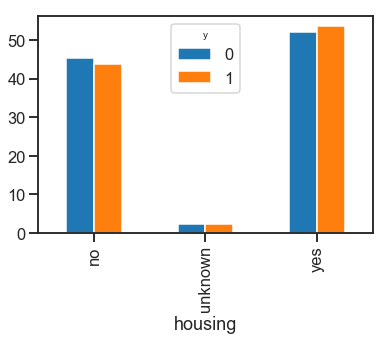

In [303]:
cross_tab_housing.plot(kind = 'bar', stacked = False)

similar to default, lets encode housing with no = 0, yes = 1 and unknown = -1

In [304]:
# Assuming 'bank' is the DataFrame containing the 'default' column
bank['housing'] = bank['housing'].replace({'yes': 1, 'no': 0, 'unknown': -1})

# Print the updated DataFrame
print(bank)

       age            job   marital            education  default  housing  \
0       49    blue-collar   married             basic.9y       -1        0   
1       37   entrepreneur   married    university.degree        0        0   
2       78        retired   married             basic.4y        0        0   
3       36         admin.   married    university.degree        0        1   
4       59        retired  divorced    university.degree        0        0   
5       29         admin.    single    university.degree        0        0   
6       26        student    single             basic.9y        0        0   
7       30    blue-collar   married             basic.4y        0        1   
8       50    blue-collar   married             basic.4y       -1        0   
9       33         admin.    single          high.school        0        1   
10      44       services  divorced          high.school        0        1   
11      32     technician   married    university.degree        

In [305]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 37 columns):
age                                  32950 non-null int64
job                                  32950 non-null object
marital                              32950 non-null object
education                            32950 non-null object
default                              32950 non-null int64
housing                              32950 non-null int64
loan                                 32950 non-null object
contact                              32950 non-null object
month                                32950 non-null object
day_of_week                          32950 non-null object
duration                             32950 non-null int64
campaign                             32950 non-null int64
pdays                                32950 non-null int64
previous                             32950 non-null int64
poutcome                             32950 non-null object
y            

### 6. loan - has personal loan

In [306]:
# Calculate cross-tabulation with percentages
cross_tab_loan = pd.crosstab(bank['loan'], bank['y'], normalize='columns') * 100

# Format and color-code the cross-tab
cross_tab_loan.style.background_gradient(cmap='RdYlGn', axis=0)


y,0,1
loan,,
no,82.3346,82.3815
unknown,2.41467,2.42457
yes,15.2507,15.194


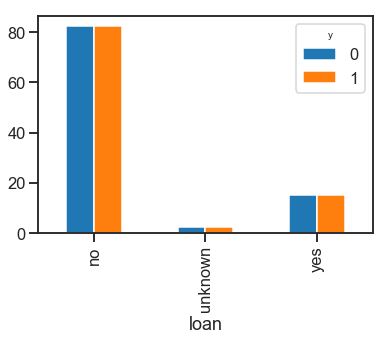

In [307]:
cross_tab_loan.plot(kind = 'bar', stacked = False)

again similar to housing, having a personal loan has similar effects on to making a long term deposit yes or no, this makes me thing that having a housing loan or personal loan will have little or no effect on making or not making a long term deposit

lets also look if combining both the loans have an effect or not

In [308]:
cross_tab_hou_lon = pd.crosstab(index=[bank['housing'],bank['loan']], columns=bank['y'], normalize = 'columns')

# Calculate the column sums
column_sums = cross_tab_hou_lon.sum()

# Sort the cross-tabulation DataFrame by column sums in descending order
cross_tab_hou_lon_sorted = cross_tab_hou_lon[column_sums.sort_values(ascending=False).index]



# Format and color-code the cross-tab
cross_tab_hou_lon_sorted.style.background_gradient(cmap='RdYlGn', axis=0)

nothing interesting can be observed from this plot as well, seems combined effect of loan and housing on Y variable is the same

Let also look by combining default with loan and housing

#### default and housing

In [309]:
cross_tab_hou_def = pd.crosstab(index=[bank['housing'],bank['default']], columns=bank['y'], normalize = 'columns')

# Calculate the column sums
column_sums = cross_tab_hou_def.sum()

# Sort the cross-tabulation DataFrame by column sums in descending order
cross_tab_hou_def_sorted = cross_tab_hou_def[column_sums.sort_values(ascending=False).index]



# Format and color-code the cross-tab
cross_tab_hou_def_sorted.style.background_gradient(cmap='RdYlGn', axis=0)

No significant information coming from the crosstab

In [310]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 37 columns):
age                                  32950 non-null int64
job                                  32950 non-null object
marital                              32950 non-null object
education                            32950 non-null object
default                              32950 non-null int64
housing                              32950 non-null int64
loan                                 32950 non-null object
contact                              32950 non-null object
month                                32950 non-null object
day_of_week                          32950 non-null object
duration                             32950 non-null int64
campaign                             32950 non-null int64
pdays                                32950 non-null int64
previous                             32950 non-null int64
poutcome                             32950 non-null object
y            

similar to housing and default, lets encode loan with no = 0, yes = 1 and unknown = -1

In [311]:
# Assuming 'bank' is the DataFrame containing the 'default' column
bank['loan'] = bank['loan'].replace({'yes': 1, 'no': 0, 'unknown': -1})

# Print the updated DataFrame
print(bank)

       age            job   marital            education  default  housing  \
0       49    blue-collar   married             basic.9y       -1        0   
1       37   entrepreneur   married    university.degree        0        0   
2       78        retired   married             basic.4y        0        0   
3       36         admin.   married    university.degree        0        1   
4       59        retired  divorced    university.degree        0        0   
5       29         admin.    single    university.degree        0        0   
6       26        student    single             basic.9y        0        0   
7       30    blue-collar   married             basic.4y        0        1   
8       50    blue-collar   married             basic.4y       -1        0   
9       33         admin.    single          high.school        0        1   
10      44       services  divorced          high.school        0        1   
11      32     technician   married    university.degree        

### 7. Contact

In [312]:
bank.contact.unique()

array(['cellular', 'telephone'], dtype=object)

lets see if there are any relation with cellular or telephone using crosstab

In [313]:
cross_tab_contact = pd.crosstab(index=bank['contact'], columns=bank['y'], normalize = 'columns')

# Calculate the column sums
column_sums = cross_tab_contact.sum()

# Sort the cross-tabulation DataFrame by column sums in descending order
cross_tab_contact_sorted = cross_tab_contact[column_sums.sort_values(ascending=False).index]



# Format and color-code the cross-tab
cross_tab_contact_sorted.style.background_gradient(cmap='RdYlGn', axis=0)

y,1,0
contact,,
cellular,0.828125,0.60996
telephone,0.171875,0.39004


it can be observed that people using cell or mobile have more tendency to respond for long term deposits

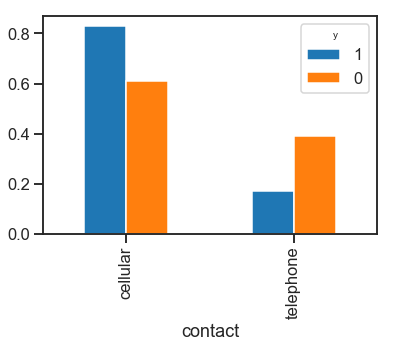

In [314]:
cross_tab_contact_sorted.plot(kind = 'bar', stacked = False)

#### performing one hot encoding on the contact column

In [315]:
# Perform one-hot encoding using pandas.get_dummies()
one_hot_encoded = pd.get_dummies(bank['contact'], prefix='contact')

# Concatenate the one-hot encoded columns with the original DataFrame
bank = pd.concat([bank, one_hot_encoded], axis=1)

# Drop the original 'job' column
bank.drop('contact', axis=1, inplace=True)

# Print the encoded DataFrame
bank.head


<bound method NDFrame.head of        age            job   marital            education  default  housing  \
0       49    blue-collar   married             basic.9y       -1        0   
1       37   entrepreneur   married    university.degree        0        0   
2       78        retired   married             basic.4y        0        0   
3       36         admin.   married    university.degree        0        1   
4       59        retired  divorced    university.degree        0        0   
5       29         admin.    single    university.degree        0        0   
6       26        student    single             basic.9y        0        0   
7       30    blue-collar   married             basic.4y        0        1   
8       50    blue-collar   married             basic.4y       -1        0   
9       33         admin.    single          high.school        0        1   
10      44       services  divorced          high.school        0        1   
11      32     technician   marrie

In [316]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 38 columns):
age                                  32950 non-null int64
job                                  32950 non-null object
marital                              32950 non-null object
education                            32950 non-null object
default                              32950 non-null int64
housing                              32950 non-null int64
loan                                 32950 non-null int64
month                                32950 non-null object
day_of_week                          32950 non-null object
duration                             32950 non-null int64
campaign                             32950 non-null int64
pdays                                32950 non-null int64
previous                             32950 non-null int64
poutcome                             32950 non-null object
y                                    32950 non-null int64
age_group      

I do not think day of the week and Month of last contact can bring in much information to long term deposit chances, but let us check with crosstabs

### 8. Day_of_the_week

In [317]:
cross_tab_dow = pd.crosstab(index=bank['day_of_week'], columns=bank['y'], normalize = 'columns')

# Calculate the column sums
column_sums = cross_tab_dow.sum()

# Sort the cross-tabulation DataFrame by column sums in descending order
cross_tab_dow_sorted = cross_tab_dow[column_sums.sort_values(ascending=False).index]



# Format and color-code the cross-tab
cross_tab_dow_sorted.style.background_gradient(cmap='RdYlGn', axis=0)

y,1,0
day_of_week,,
fri,0.185884,0.192626
mon,0.188039,0.209111
thu,0.221713,0.206375
tue,0.201509,0.194815
wed,0.202856,0.197072


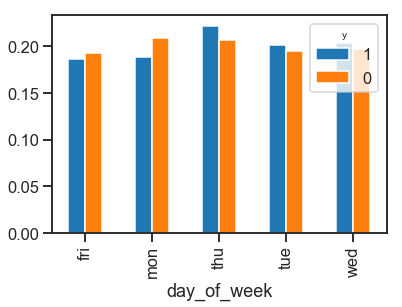

In [318]:
cross_tab_dow_sorted.plot(kind = 'bar', stacked = False)

As we thought there is no significant information, so we will be dropping this column

In [319]:
bank_5 = bank.copy()

In [320]:
# Drop the original 'day_of_week' column
bank.drop('day_of_week', axis=1, inplace=True)

### 9. month

In [321]:
bank.month.unique()

array(['nov', 'jul', 'may', 'jun', 'aug', 'mar', 'oct', 'apr', 'sep',
       'dec'], dtype=object)

In [322]:
cross_tab_month = pd.crosstab(index=bank['month'], columns=bank['y'], normalize = 'columns')

# cross_tab_month
# # Calculate the column sums
# column_sums = cross_tab_month.sum()
# column_sums

# # Sort the cross-tabulation DataFrame by column sums in descending order
# cross_tab_month_sorted = cross_tab_month[column_sums.sort_values(ascending=False).index]



# # Format and color-code the cross-tab
cross_tab_month.style.background_gradient(cmap='RdYlGn', axis=0)

y,0,1
month,,
apr,0.056707,0.115032
aug,0.151071,0.14305
dec,0.00242835,0.0193966
jul,0.178911,0.143319
jun,0.130173,0.118804
mar,0.00749025,0.0584591
may,0.352692,0.188308
nov,0.100349,0.0894397
oct,0.0113893,0.0684267


There seems to be some information here lets plot a bar chart

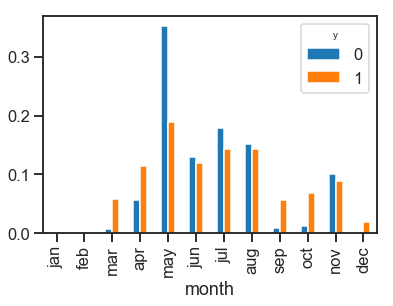

In [323]:
months_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
cross_tab_month = cross_tab_month.reindex(months_order)

cross_tab_month.plot(kind = 'bar', stacked = False)

may to aug seems to have most of the people making long term deposits, Jan feb does not have any deposits

In [324]:
# bank['months'] = bank['months'].replace({'yes': 1, 'no': 0, 'unknown': -1})

bank['month'] = bank['month'].replace({'jan': 1, 'feb' : 2, 'mar' : 3, 'apr' : 4, 'may' : 5, 'jun' : 6, 'jul' : 7, 'aug' : 8, 'sep' : 9, 'oct' : 10, 'nov' : 11, 'dec' : 12})

In [325]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 37 columns):
age                                  32950 non-null int64
job                                  32950 non-null object
marital                              32950 non-null object
education                            32950 non-null object
default                              32950 non-null int64
housing                              32950 non-null int64
loan                                 32950 non-null int64
month                                32950 non-null int64
duration                             32950 non-null int64
campaign                             32950 non-null int64
pdays                                32950 non-null int64
previous                             32950 non-null int64
poutcome                             32950 non-null object
y                                    32950 non-null int64
age_group                            32950 non-null category
job_admin.    

### 10. Duration

In [326]:
bank.duration.describe()

count    32950.000000
mean       258.127466
std        258.975917
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

mean for duration is around 258 with sd of 258, min of 0 vs max of 4918 lets look at some scatter plots

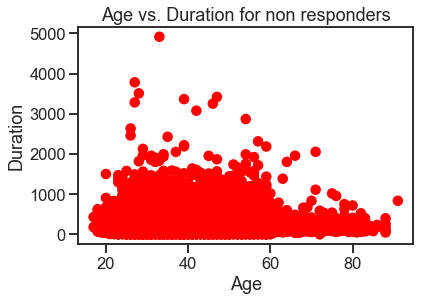

In [327]:
import matplotlib.pyplot as plt

plt.scatter(df_zero['age'], df_zero['duration'], c=df_zero['y'].map({1: 'blue', 0: 'red'}))
plt.xlabel('Age')
plt.ylabel('Duration')
plt.title('Age vs. Duration for non responders')
plt.show()

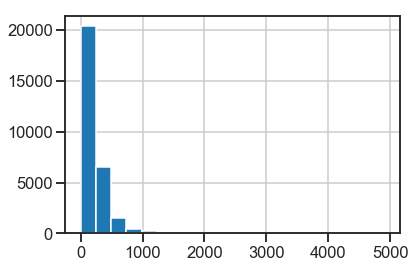

In [328]:
df_zero.duration.hist(bins = 20)

In [329]:
df_zero.duration.mean()

221.14819755113209

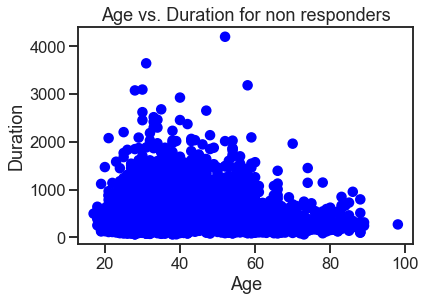

In [330]:
import matplotlib.pyplot as plt

plt.scatter(df_one['age'], df_one['duration'], c=df_one['y'].map({1: 'blue', 0: 'red'}))
plt.xlabel('Age')
plt.ylabel('Duration')
plt.title('Age vs. Duration for non responders')
plt.show()

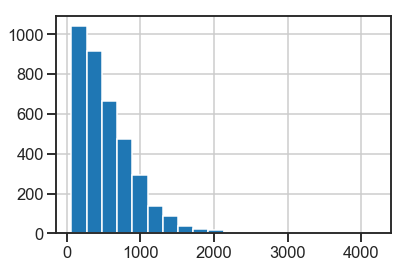

In [331]:
df_one.duration.hist(bins = 20)

In [332]:
df_one.duration.mean()

549.3989762931035

it looks like there are some outliers and hard to imply anything from the above plot

### 11. campaign

In [333]:
bank.campaign.unique()

array([ 4,  2,  1,  5,  9,  3,  7,  6, 13,  8, 12, 10, 19, 11, 31, 17, 16,
       29, 43, 20, 14, 21, 35, 15, 33, 28, 22, 25, 18, 23, 27, 26, 24, 34,
       32, 37, 30, 42, 40, 56], dtype=int64)

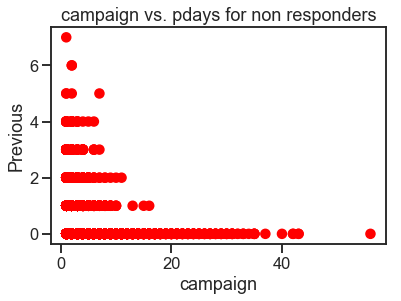

In [334]:
import matplotlib.pyplot as plt

plt.scatter(df_zero['campaign'], df_zero['previous'], c=df_zero['y'].map({1: 'blue', 0: 'red'}))
plt.xlabel('campaign')
plt.ylabel('Previous')
plt.title('campaign vs. pdays for non responders')
plt.show()

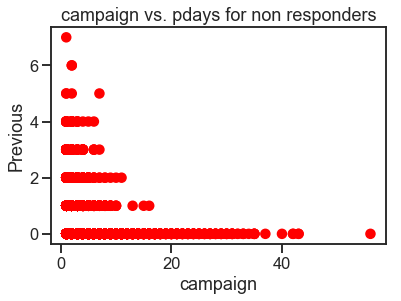

In [335]:
import matplotlib.pyplot as plt

plt.scatter(df_zero['campaign'], df_zero['previous'], c=df_zero['y'].map({1: 'blue', 0: 'red'}))
plt.xlabel('campaign')
plt.ylabel('Previous')
plt.title('campaign vs. pdays for non responders')
plt.show()

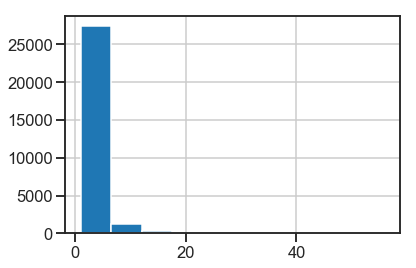

In [336]:
df_zero.campaign.hist(bins = 10)

In [337]:
df_zero.campaign.mean()

2.6248033381216227

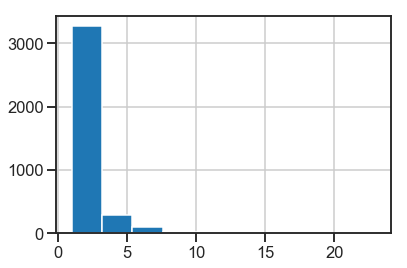

In [338]:
df_one.campaign.hist(bins = 10)

In [339]:
df_one.campaign.mean()

2.054956896551724

it looks like previous and pdays are numerical categorical columns, lets look at them using crosstab

### 12. pdays 

number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)

In [340]:
cross_tab_pdays = pd.crosstab(index=bank['pdays'], columns=bank['y'], normalize = 'columns')

cross_tab_pdays.style.background_gradient(cmap='RdYlGn', axis=0)

y,0,1
pdays,,
0,0.00017101,0.00188578
1,0.000513031,0.00188578
2,0.000752445,0.0080819
3,0.00407005,0.0635776
4,0.0015733,0.0137392
5,0.000513031,0.00673491
6,0.0033518,0.0643858
7,0.000547233,0.00835129
8,0.00017101,0.00242457


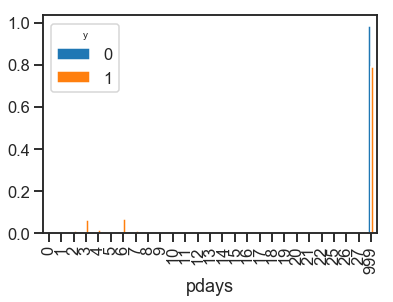

In [341]:
cross_tab_pdays.plot(kind = 'bar', stacked = False)

most of them have values 999

### 13. Previous

number of contacts performed before this campaign and for this client

In [342]:
cross_tab_previous = pd.crosstab(index=bank['previous'], columns=bank['y'], normalize = 'columns')

cross_tab_previous.style.background_gradient(cmap='RdYlGn', axis=0)

y,0,1
previous,,
0,0.886347,0.673761
1,0.0988098,0.211207
2,0.0110815,0.0759698
3,0.00253095,0.0272091
4,0.00099186,0.00835129
5,0.000136808,0.00269397
6,6.84041e-05,0.00080819
7,3.42021e-05,0


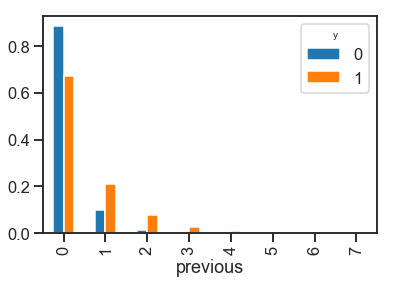

In [343]:
cross_tab_previous.plot(kind = 'bar', stacked = False)

In [344]:
# Assuming 'bank' is the DataFrame and 'previous' is the variable

# Replace values in 'previous' column
bank['previous_new'] = bank['previous'].apply(lambda x: '0' if x == 0 else "more than 0")

cross_tab_previous_new = pd.crosstab(index=bank['previous_new'], columns=bank['y'], normalize = 'columns')

cross_tab_previous_new.style.background_gradient(cmap='RdYlGn', axis=0)

y,0,1
previous_new,,
0,0.886347,0.673761
more than 0,0.113653,0.326239


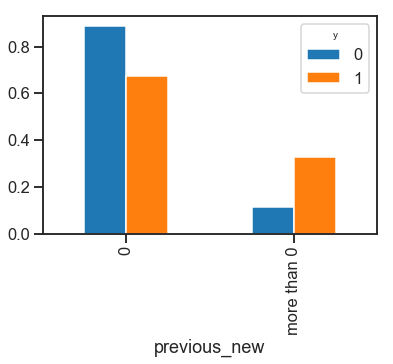

In [345]:
cross_tab_previous_new.plot(kind = 'bar', stacked = False)

In [346]:
# Perform one-hot encoding using pandas.get_dummies()
one_hot_encoded = pd.get_dummies(bank['previous_new'], prefix='previous_new')

# Concatenate the one-hot encoded columns with the original DataFrame
bank = pd.concat([bank, one_hot_encoded], axis=1)

# Drop the original 'previous' and 'previous_new' columns
bank.drop(['previous', 'previous_new'], axis=1, inplace=True)

most responses come from perople who have been contacted currently or a daya has passed since last contact

### 14. age_group

In [347]:
# Perform one-hot encoding using pandas.get_dummies()
one_hot_encoded = pd.get_dummies(bank['age_group'], prefix='age_group')

# Concatenate the one-hot encoded columns with the original DataFrame
bank = pd.concat([bank, one_hot_encoded], axis=1)

# Drop the original 'job' column
bank.drop('age_group', axis=1, inplace=True)

# Print the encoded DataFrame
bank.head

<bound method NDFrame.head of        age            job   marital            education  default  housing  \
0       49    blue-collar   married             basic.9y       -1        0   
1       37   entrepreneur   married    university.degree        0        0   
2       78        retired   married             basic.4y        0        0   
3       36         admin.   married    university.degree        0        1   
4       59        retired  divorced    university.degree        0        0   
5       29         admin.    single    university.degree        0        0   
6       26        student    single             basic.9y        0        0   
7       30    blue-collar   married             basic.4y        0        1   
8       50    blue-collar   married             basic.4y       -1        0   
9       33         admin.    single          high.school        0        1   
10      44       services  divorced          high.school        0        1   
11      32     technician   marrie

### 15. poutcome

In [348]:
cross_tab_poutcome = pd.crosstab(index=bank['poutcome'], columns=bank['y'], normalize = 'columns')

cross_tab_poutcome.style.background_gradient(cmap='RdYlGn', axis=0)

y,0,1
poutcome,,
failure,0.100383,0.133082
nonexistent,0.886347,0.673761
success,0.0132704,0.193157


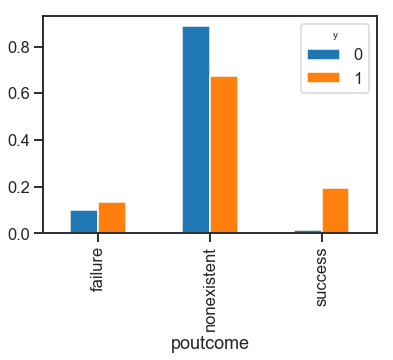

In [349]:
cross_tab_poutcome.plot(kind = 'bar', stacked = False)

most responses are coming from non existent that have possibly nothing to do with the last campaign, that kind of means last campaign was not succesful

encoding poutcome as well with success being 1, failure = 0 and non existent = -1

In [350]:
# Assuming 'bank' is the DataFrame containing the 'default' column
bank['poutcome'] = bank['poutcome'].replace({'success': 1, 'failure': 0, 'nonexistent': -1})

# Print the updated DataFrame
print(bank)

       age            job   marital            education  default  housing  \
0       49    blue-collar   married             basic.9y       -1        0   
1       37   entrepreneur   married    university.degree        0        0   
2       78        retired   married             basic.4y        0        0   
3       36         admin.   married    university.degree        0        1   
4       59        retired  divorced    university.degree        0        0   
5       29         admin.    single    university.degree        0        0   
6       26        student    single             basic.9y        0        0   
7       30    blue-collar   married             basic.4y        0        1   
8       50    blue-collar   married             basic.4y       -1        0   
9       33         admin.    single          high.school        0        1   
10      44       services  divorced          high.school        0        1   
11      32     technician   married    university.degree        

## lets look at outliers using the below methods

### 1 outliers using box plot

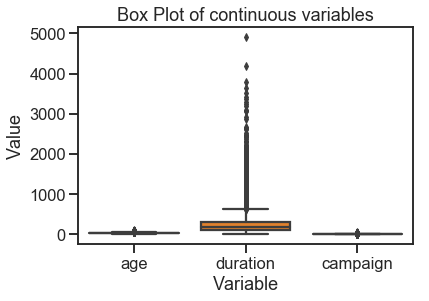

In [351]:
import seaborn as sns

sns.boxplot(data=bank[['age', 'duration', 'campaign']])
plt.xlabel('Variable')
plt.ylabel('Value')
plt.title('Box Plot of continuous variables')
plt.show()

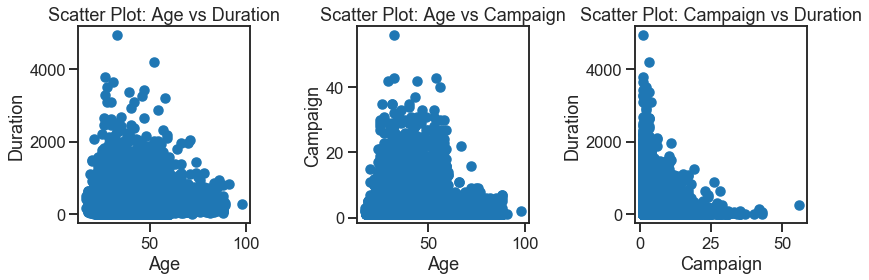

In [352]:
plt.figure(figsize=(12, 4))

# Scatter plot: age vs duration
plt.subplot(1, 3, 1)
plt.scatter(bank['age'], bank['duration'])
plt.xlabel('Age')
plt.ylabel('Duration')
plt.title('Scatter Plot: Age vs Duration')

# Scatter plot: age vs campaign
plt.subplot(1, 3, 2)
plt.scatter(bank['age'], bank['campaign'])
plt.xlabel('Age')
plt.ylabel('Campaign')
plt.title('Scatter Plot: Age vs Campaign')

# Scatter plot: campaign vs duration
plt.subplot(1, 3, 3)
plt.scatter(bank['campaign'], bank['duration'])
plt.xlabel('Campaign')
plt.ylabel('Duration')
plt.title('Scatter Plot: Campaign vs Duration')

plt.tight_layout()
plt.show()




In [110]:
# sns.boxplot(x=bank['age'])

In [111]:
# sns.boxplot(x=bank['duration'])

In [112]:
# sns.boxplot(x=bank['campaign'])

In [113]:
# sns.boxplot(x=bank['pdays'])

In [114]:
# sns.boxplot(x=bank['previous'])

### 2. Zscore Method

In [115]:
# from scipy import stats

# z_scores = stats.zscore(bank[['age', 'duration', 'campaign', 'pdays', 'previous']])
# threshold = 3
# bank_no_outliers = bank[(z_scores < threshold).all(axis=1)]

In [116]:
# bank_no_outliers

### 3. Robust Zscore method

In [117]:
# median = bank[['age', 'duration', 'campaign', 'pdays', 'previous']].median()
# median_absolute_deviation = (bank[['age', 'duration', 'campaign', 'pdays', 'previous']] - median).abs().median()
# modified_z_scores = 0.6745 * (bank[['age', 'duration', 'campaign', 'pdays', 'previous']] - median) / median_absolute_deviation
# threshold = 3
# bank_no_outliers = bank[(modified_z_scores < threshold).all(axis=1)]

In [118]:
# bank_no_outliers

## Removing outliers

#### duration - anything above 2000 to be removed as outlier

In [353]:
# Assuming 'bank' is the DataFrame

# Remove outliers from 'duration' column
bank = bank[bank['duration'] <= 2500]


In [354]:
# bank.sort_values(by = 'duration', ascending = False)[:10]['duration']


removing 4,918 and 4,199 as they look like outliers

In [355]:
# bank = bank.drop(bank.index[[4770,19242]])

In [356]:
# bank.sort_values(by = 'duration', ascending = False)[:10]['duration']


#### age - anything aboove the age of 90 to be treated as outlier

In [357]:

# Remove outliers from 'age' column
bank = bank[bank['age'] <= 90]


In [358]:
# bank.sort_values(by = 'age', ascending = False)[:10]['age']


age does not look like they have outliers

#### campaign - anything above 35 to be treated as outlier

In [359]:

# Remove outliers from 'campaign' column
bank = bank[bank['campaign'] <= 35]

In [360]:
# bank.sort_values(by = 'campaign', ascending = False)[:10]['campaign']


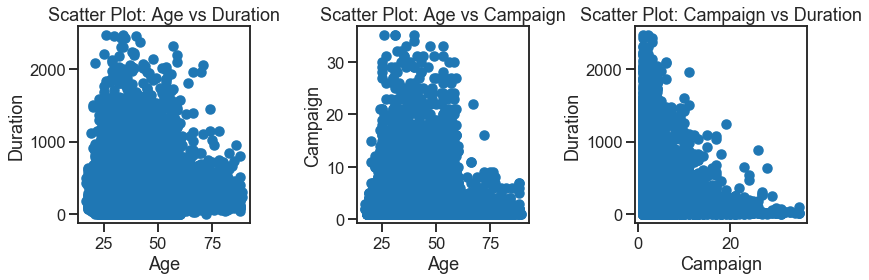

In [361]:
plt.figure(figsize=(12, 4))

# Scatter plot: age vs duration
plt.subplot(1, 3, 1)
plt.scatter(bank['age'], bank['duration'])
plt.xlabel('Age')
plt.ylabel('Duration')
plt.title('Scatter Plot: Age vs Duration')

# Scatter plot: age vs campaign
plt.subplot(1, 3, 2)
plt.scatter(bank['age'], bank['campaign'])
plt.xlabel('Age')
plt.ylabel('Campaign')
plt.title('Scatter Plot: Age vs Campaign')

# Scatter plot: campaign vs duration
plt.subplot(1, 3, 3)
plt.scatter(bank['campaign'], bank['duration'])
plt.xlabel('Campaign')
plt.ylabel('Duration')
plt.title('Scatter Plot: Campaign vs Duration')

plt.tight_layout()
plt.show()




### lets look at correlation and pair plot

In [128]:
# import seaborn as sns
# fig = plt.figure(figsize = (25,20))
# # Correlation Plot
# correlation_matrix = bank.corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Plot')
# plt.show()



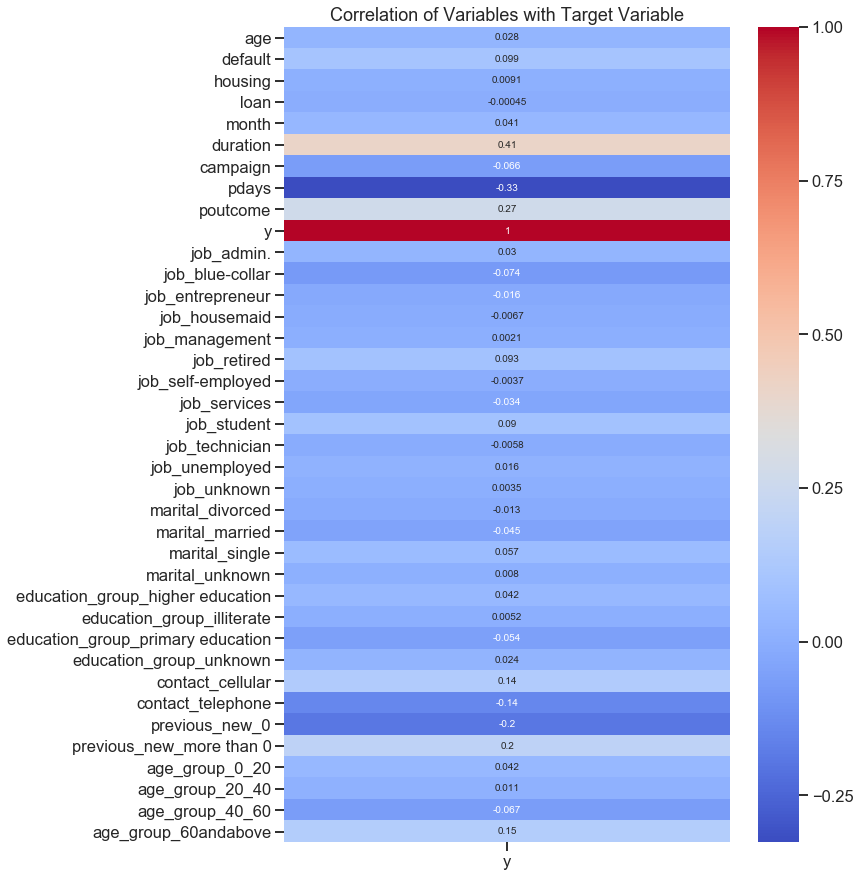

In [362]:
# Calculate the correlation matrix
corr_matrix = bank.corr()
# corr_matrix['y']
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 15))
sns.heatmap(corr_matrix[['y']], annot=True, cmap='coolwarm')
plt.title('Correlation of Variables with Target Variable')
plt.show()

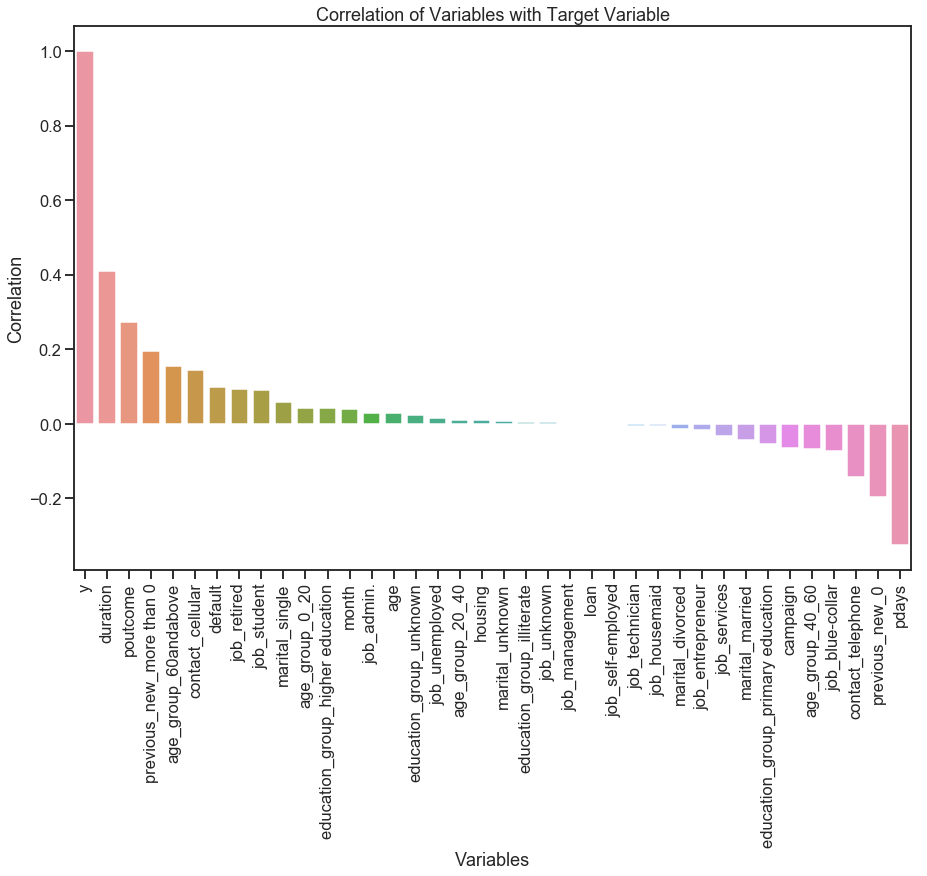

In [363]:

# Assuming 'bank' is the DataFrame and 'Y' is the target variable

# Calculate the correlation with target variable
correlation = bank.corr()['y'].sort_values(ascending=False)

# Plot the correlations
plt.figure(figsize=(15, 10))
sns.barplot(x=correlation.index, y=correlation.values)
plt.xticks(rotation=90)
plt.xlabel('Variables')
plt.ylabel('Correlation')
plt.title('Correlation of Variables with Target Variable')
plt.show()

In [364]:
bank_6 = bank.copy()

In [365]:
# bank = bank_6

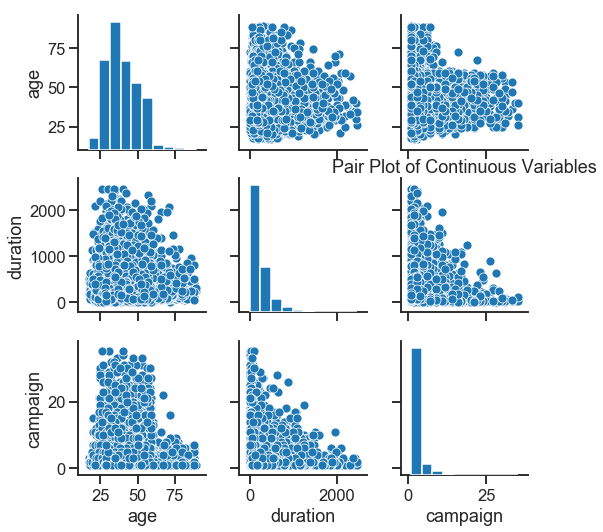

In [366]:
# Assuming 'bank' is the DataFrame and 'continuous_cols' is a list of continuous variable column names
continuous_cols = ['age','duration', 'campaign']
bank_continuous = bank[continuous_cols]
sns.pairplot(bank_continuous)
plt.title('Pair Plot of Continuous Variables')
plt.show()

### Deleting extra columns

In [367]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32921 entries, 0 to 32949
Data columns (total 41 columns):
age                                  32921 non-null int64
job                                  32921 non-null object
marital                              32921 non-null object
education                            32921 non-null object
default                              32921 non-null int64
housing                              32921 non-null int64
loan                                 32921 non-null int64
month                                32921 non-null int64
duration                             32921 non-null int64
campaign                             32921 non-null int64
pdays                                32921 non-null int64
poutcome                             32921 non-null int64
y                                    32921 non-null int64
job_admin.                           32921 non-null uint8
job_blue-collar                      32921 non-null uint8
job_entrepreneur  

In [368]:
column_name = ['age', 'job', 'marital', 'education']

bank.drop(column_name, axis=1, inplace=True)

## Feature Engineering

## Train logistic regression models

First, let's split the training and testing dataset. Training dataset will be used to train and tune models, and testing dataset will be used to evaluate the models. Note that you may also split a validation dataset from the training dataset for model tuning only.


In [136]:
rs = 47

In [369]:
### BEGIN SOLUTION
df_uniques = pd.DataFrame([[i, len(bank[i].unique())] for i in bank.columns], columns=['Variable', 'Unique Values']).set_index('Variable')
df_uniques

,Unique Values
Variable,
default,3
housing,3
loan,3
month,10
duration,1447
campaign,35
pdays,27
poutcome,3
y,2


In [371]:
binary_variables = list(df_uniques[df_uniques['Unique Values'] == 2].index)
len(binary_variables)

29

In [372]:
# print(f"Training dataset shape, X_train: {X_train.shape}, y_train: {y_train.shape}")

In [373]:
categorical_variables = list(df_uniques[(6 >= df_uniques['Unique Values']) & (df_uniques['Unique Values'] > 2)].index)
categorical_variables

['default', 'housing', 'loan', 'poutcome']

In [374]:
ordinal_variables = ['default', 'housing', 'loan', 'poutcome','month','pdays']

In [375]:
numeric_variables = list(set(bank.columns) - set(ordinal_variables) - set(categorical_variables) - set(binary_variables))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B3107AA358>,
      dtype=object)

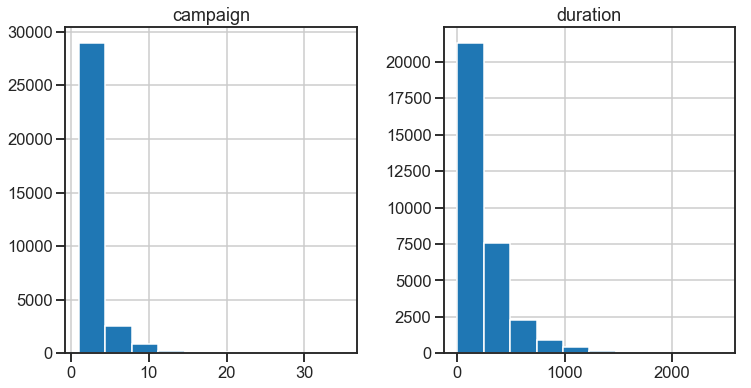

In [376]:
bank[numeric_variables].hist(figsize=(12, 6))

### label encoding ordinal encoding 

In [377]:
### BEGIN SOLUTION
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OrdinalEncoder

In [378]:
lb, le = LabelBinarizer(), LabelEncoder()

In [379]:
for column in ordinal_variables:
    bank[column] = le.fit_transform(bank[column])

In [380]:
bank[ordinal_variables].astype('category').describe()

,default,housing,loan,poutcome,month,pdays
count,32921,32921,32921,32921,32921,32921
unique,3,3,3,3,10,27
top,1,2,1,0,2,26
freq,25984,17237,27109,28389,11003,31696


In [381]:
for column in binary_variables:
    bank[column] = lb.fit_transform(bank[column])

In [382]:
categorical_variables

['default', 'housing', 'loan', 'poutcome']

In [383]:
categorical_variables = list(set(categorical_variables) - set(ordinal_variables))
categorical_variables

[]

In [384]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

In [385]:
for column in [ordinal_variables + numeric_variables]:
    bank[column] = mm.fit_transform(bank[column])

In [386]:
round(bank.describe().T, 3)

,count,mean,std,min,25%,50%,75%,max
default,32921.0,0.395,0.204,0.0,0.500,0.500,0.500,1.0
housing,32921.0,0.750,0.273,0.0,0.500,1.000,1.000,1.0
loan,32921.0,0.564,0.200,0.0,0.500,0.500,0.500,1.0
month,32921.0,0.401,0.227,0.0,0.222,0.333,0.556,1.0
duration,32921.0,0.104,0.101,0.0,0.042,0.073,0.130,1.0
campaign,32921.0,0.046,0.079,0.0,0.000,0.029,0.059,1.0
pdays,32921.0,0.971,0.148,0.0,1.000,1.000,1.000,1.0
poutcome,32921.0,0.086,0.229,0.0,0.000,0.000,0.000,1.0
y,32921.0,0.112,0.316,0.0,0.000,0.000,0.000,1.0
job_admin.,32921.0,0.252,0.434,0.0,0.000,0.000,1.000,1.0


In [387]:
### BEGIN SOLUTION
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

In [388]:
# Set up X and y variables
y, X = bank['y'], bank.drop(columns='y')
# Split the data into training and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

In [389]:
print(f"Testing dataset shape, X_test: {X_test.shape}, y_test: {y_test.shape}")

Testing dataset shape, X_test: (9877, 36), y_test: (9877,)


In [390]:
print(f"Training dataset shape, X_train: {X_train.shape}, y_train: {y_train.shape}")

Training dataset shape, X_train: (23044, 36), y_train: (23044,)


In [391]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)

### 1. l2 penalty

In [392]:
# L2 penalty to shrink coefficients without removing any features from the model
penalty= 'l2'
# Our classification problem is multinomial
multi_class = 'ovr'
# Use lbfgs for L2 penalty and multinomial classes
solver = 'saga'
# Max iteration = 1000
max_iter = 1000

In [393]:
# Define a logistic regression model with above arguments
l2_model = LogisticRegression(random_state=rs, penalty=penalty, multi_class=multi_class, solver=solver, max_iter=max_iter)

In [394]:
l2_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=47, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [395]:
l2_preds = l2_model.predict(X_test)

In [396]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp)
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [397]:
evaluate_metrics(y_test, l2_preds)

{'accuracy': 0.909081704971145,
 'recall': array([0.98072317, 0.34324324]),
 'precision': array([0.92183982, 0.69272727]),
 'f1score': array([0.95037029, 0.45903614])}

In [398]:
# y_train_pred_gr = GR.predict(X_train)
# y_test_pred_gr = GR.predict(X_test)

train_test_gr_error = pd.DataFrame(measure_error(y_test, l2_preds, 'test log reg l2'))
train_test_gr_error

,test log reg l2
accuracy,0.909082
precision,0.692727
recall,0.343243
f1,0.459036


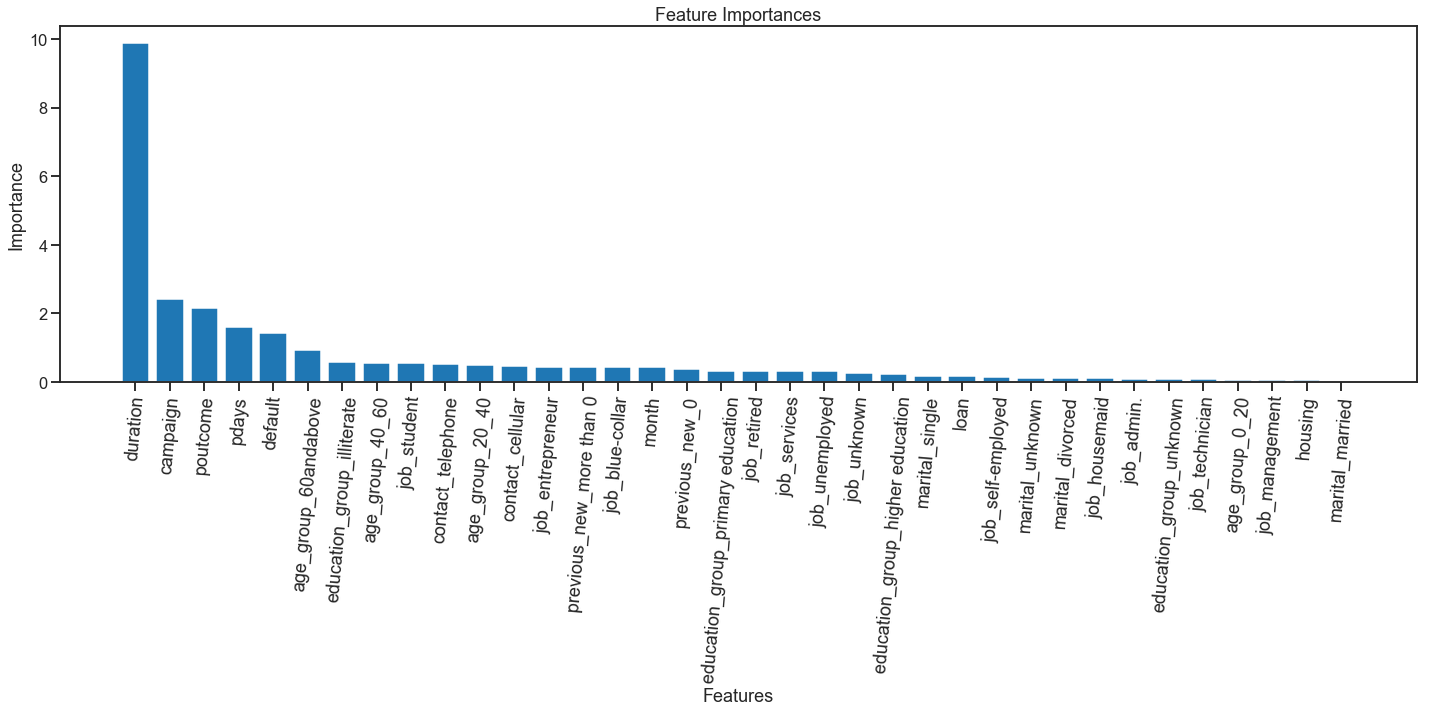

In [399]:
# Get the feature importances
importances = np.abs(l2_model.coef_[0])

# Sort the importances in descending order
indices = np.argsort(importances)[::-1]

# Get the feature names
feature_names = X.columns

# Plot the feature importances
plt.figure(figsize=(20, 10))
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), feature_names[indices], rotation=85, fontsize = 18)
plt.xlabel('Features', fontsize=18)
plt.ylabel('Importance', fontsize=18)
plt.title('Feature Importances', fontsize=18)
plt.tight_layout()
plt.show()

In [402]:
l2_feats = feature_names[indices]

As we can see from  the above evaluation results, the logistic regression model has relatively okay performance on this binomial classification task. The overall accuracy is around `0.90` and the f1score is around `0.94 for dominant class`. Note that for `recall`, `precision`, and `f1score`, we output the values for each class to see how the model performs on an individual class. And, we can see from the results, the recall for `class=1` (More often) is not very good. This is actually a common problem called imbalanced classification challenge. 


### 2. l1 penalty

In [431]:
# L1 penalty to shrink coefficients without removing any features from the model
penalty= 'l1'
# Our classification problem is multinomial
multi_class = 'ovr'
# Use saga for L1 penalty and multinomial classes
solver = 'saga'
# Max iteration = 1000
max_iter = 1000
c=0.07

In [432]:
# Define a logistic regression model with above arguments
l1_model = LogisticRegression(random_state=rs, penalty=penalty, multi_class=multi_class, solver=solver, max_iter = 1000, C = c)

In [433]:
l1_model.fit(X_train, y_train)

LogisticRegression(C=0.07, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='ovr', n_jobs=None, penalty='l1',
                   random_state=47, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [434]:
l1_preds = l1_model.predict(X_test)

In [435]:
# odd_ratios = l1_model.predict_proba(X_test[:1, :])[0]
# odd_ratios

In [438]:
evaluate_metrics(y_train, l1_model.predict(X_train))

{'accuracy': 0.903315396632529,
 'recall': array([0.97961179, 0.30104207]),
 'precision': array([0.91710532, 0.65162907]),
 'f1score': array([0.94732861, 0.41182682])}

In [439]:
evaluate_metrics(y_test, l1_preds)

{'accuracy': 0.909081704971145,
 'recall': array([0.98209194, 0.33243243]),
 'precision': array([0.92075714, 0.70152091]),
 'f1score': array([0.95043603, 0.45110024])}

In [440]:
y_test.value_counts()

0    8767
1    1110
Name: y, dtype: int64

In [441]:
# l1_preds.value_counts()

In [442]:
# y_train_pred_gr = GR.predict(X_train)
# y_test_pred_gr = GR.predict(X_test)

train_test_gr_error = pd.concat([train_test_gr_error,
                                 measure_error(y_test, l1_preds, 'test log reg l1')],
                                axis=1)
train_test_gr_error

,test log reg l2,test log reg l1
accuracy,0.909082,0.909082
precision,0.692727,0.701521
recall,0.343243,0.332432
f1,0.459036,0.451100


In [443]:
importances

array([1.4168322 , 0.04376496, 0.16266402, 0.42471839, 9.87704611,
       2.42669239, 1.59953718, 2.15985322, 0.08482205, 0.42800153,
       0.44786244, 0.11223535, 0.05906473, 0.33090839, 0.14817488,
       0.32999523, 0.55515382, 0.07787601, 0.31848525, 0.27088408,
       0.11299531, 0.02171369, 0.1690512 , 0.12072618, 0.22201835,
       0.59219584, 0.33212937, 0.08100472, 0.46956326, 0.51251986,
       0.38545211, 0.42840871, 0.06463802, 0.48062224, 0.56492786,
       0.93795549])

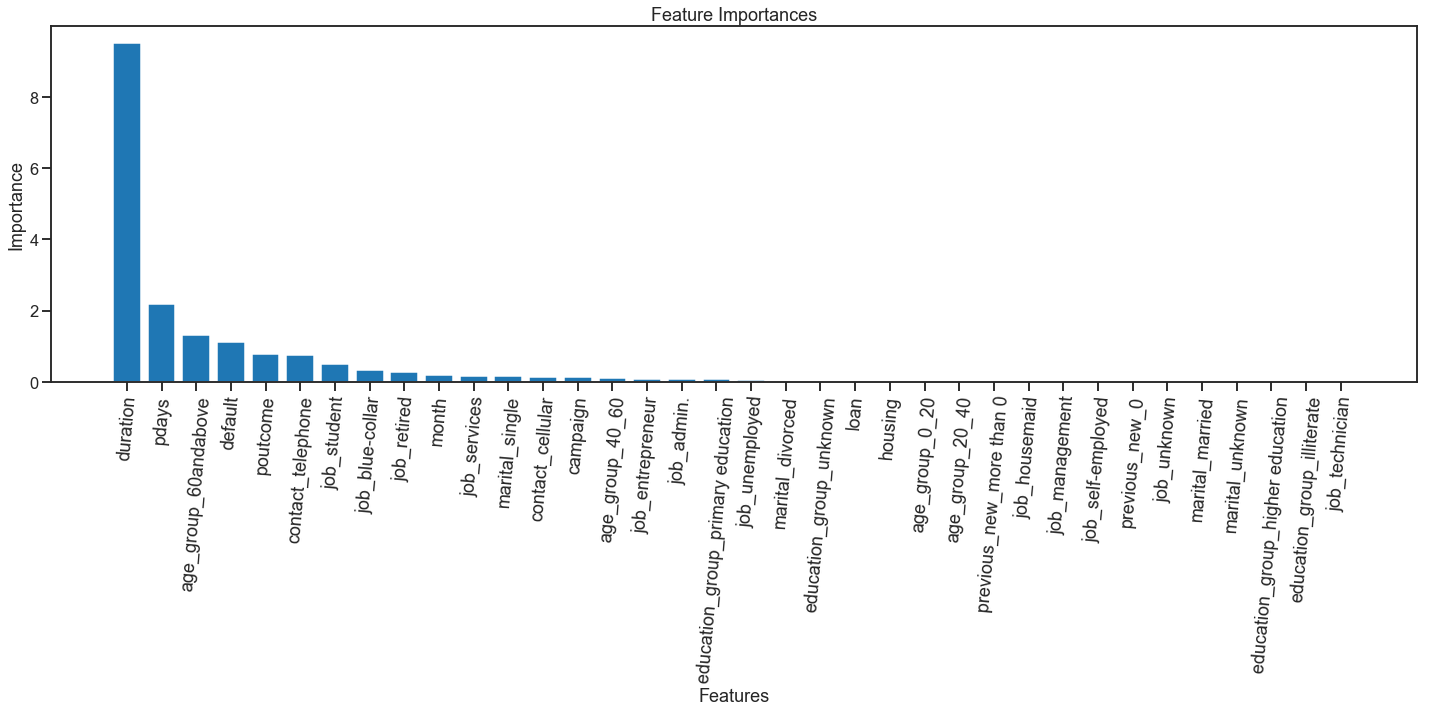

In [444]:
# Get the feature importances
importances = np.abs(l1_model.coef_[0])

# Sort the importances in descending order
indices = np.argsort(importances)[::-1]

# Get the feature names
feature_names = X.columns

# Plot the feature importances
plt.figure(figsize=(20, 10))
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), feature_names[indices], rotation=85, fontsize = 18)
plt.xlabel('Features', fontsize=18)
plt.ylabel('Importance', fontsize=18)
plt.title('Feature Importances', fontsize=18)
plt.tight_layout()
plt.show()

In [558]:
def log_feat_imp(model, feat_nms, flt):
    if flt == 'log':
        importances = np.abs(model.coef_[0])
    elif flt == 'dt':
        importances = model.feature_importances_
        
    # Sort the importances in descending order
    indices = np.argsort(importances)[::-1]
    feature_names = feat_nms

    # Plot the feature importances
    plt.figure(figsize=(20, 10))
    plt.bar(range(len(indices)), importances[indices])
    plt.xticks(range(len(indices)), feature_names[indices], rotation=85, fontsize = 18)
    plt.xlabel('Features', fontsize=18)
    plt.ylabel('Importance', fontsize=18)
    plt.title('Feature Importances', fontsize=18)
    plt.tight_layout()
    plt.show()

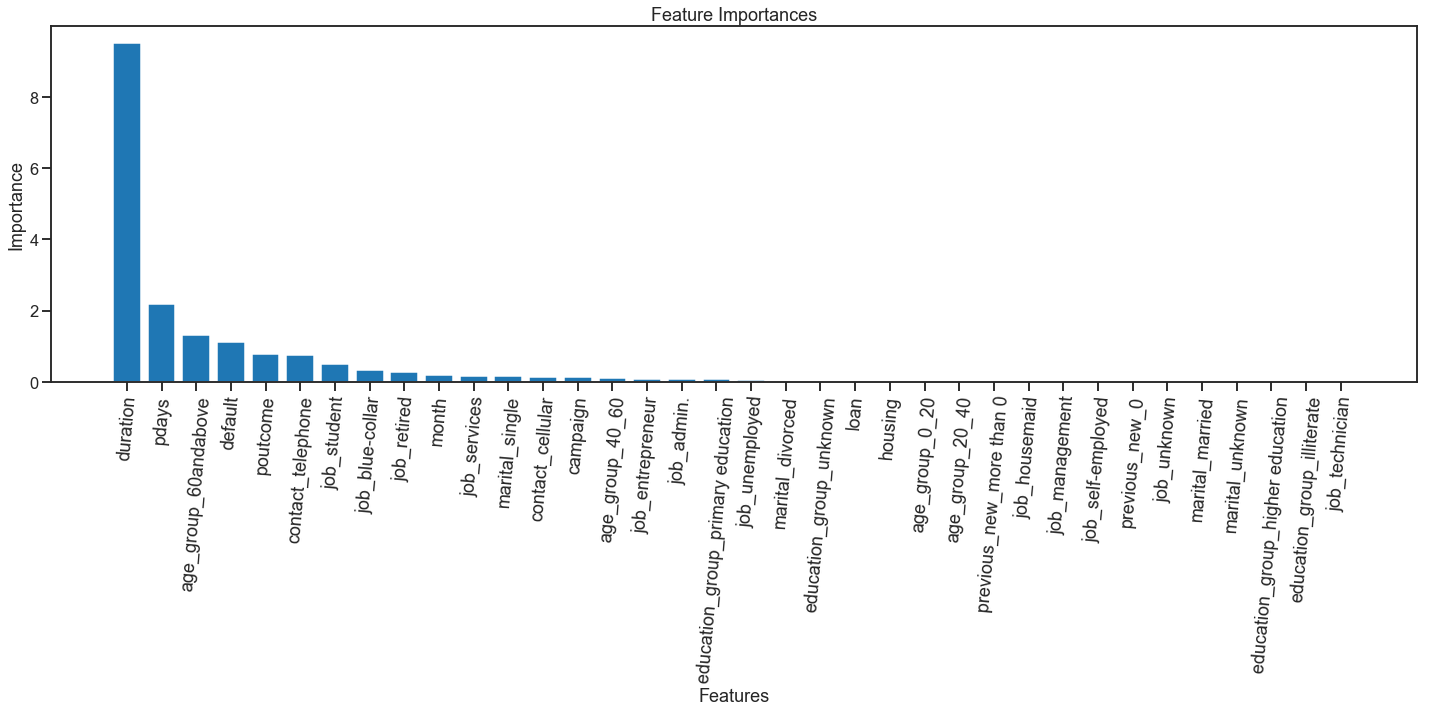

In [451]:
log_feat_imp(l1_model, X.columns)

In [445]:
l1_feats = feature_names[indices]

In [446]:
# Find the differences using the difference() function
index_difference = l1_feats.difference(l2_feats)
index_difference

Index([], dtype='object')

In [447]:
l2_feats.difference(l1_feats)

Index([], dtype='object')

### confusion matrix

Text(0.5, 76.5, 'Prediction')

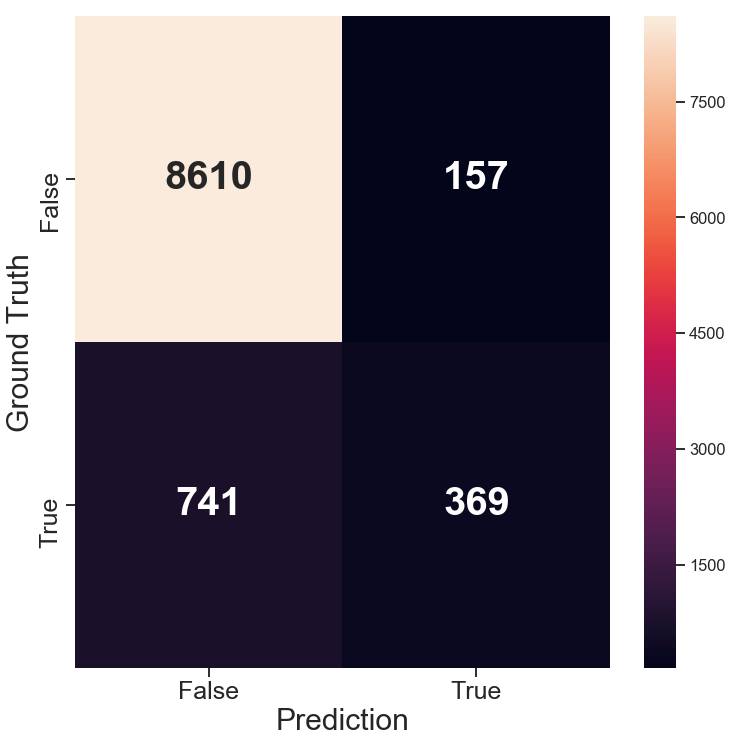

In [448]:
# Plot confusion matrix
sns.set_palette(sns.color_palette())
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(confusion_matrix(y_test, l1_preds), annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})  
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels, fontsize=25);
ax.set_ylabel('Ground Truth', fontsize=30);
ax.set_xlabel('Prediction', fontsize=30)
### END SOLUTION

In [183]:
# Extract and sort feature coefficients
def get_feature_coefs(regression_model, label_index, columns):
    coef_dict = {}
    for coef, feat in zip(regression_model.coef_[label_index, :], columns):
        if abs(coef) >= 0.05:
            coef_dict[feat] = coef
    # Sort coefficients
    coef_dict = {k: v for k, v in sorted(coef_dict.items(), key=lambda item: item[1])}
    return coef_dict

# Generate bar colors based on if value is negative or positive
def get_bar_colors(values):
    color_vals = []
    for val in values:
        if val <= 0:
            color_vals.append('r')
        else:
            color_vals.append('g')
    return color_vals

# Visualize coefficients
def visualize_coefs(coef_dict):
    features = list(coef_dict.keys())
    values = list(coef_dict.values())
    y_pos = np.arange(len(features))
    color_vals = get_bar_colors(values)
    plt.rcdefaults()
    fig = plt.figure(figsize = (25,20))
    fig, ax = plt.subplots()
    ax.barh(y_pos, values, align='center', color=color_vals)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(features)
    # labels read top-to-bottom
    ax.invert_yaxis()  
    ax.set_xlabel('Feature Coefficients')
    ax.set_title('')
    plt.show()

In [184]:
feature_cols = list(X.columns)
feature_cols


['default',
 'housing',
 'loan',
 'month',
 'duration',
 'campaign',
 'pdays',
 'poutcome',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_group_higher education',
 'education_group_illiterate',
 'education_group_primary education',
 'education_group_unknown',
 'contact_cellular',
 'contact_telephone',
 'previous_new_0',
 'previous_new_more than 0',
 'age_group_0_20',
 'age_group_20_40',
 'age_group_40_60',
 'age_group_60andabove']

In [185]:
# Get the coefficents for Class 1, Less Often
coef_dict = get_feature_coefs(l1_model, 0, feature_cols)

<Figure size 2500x2000 with 0 Axes>

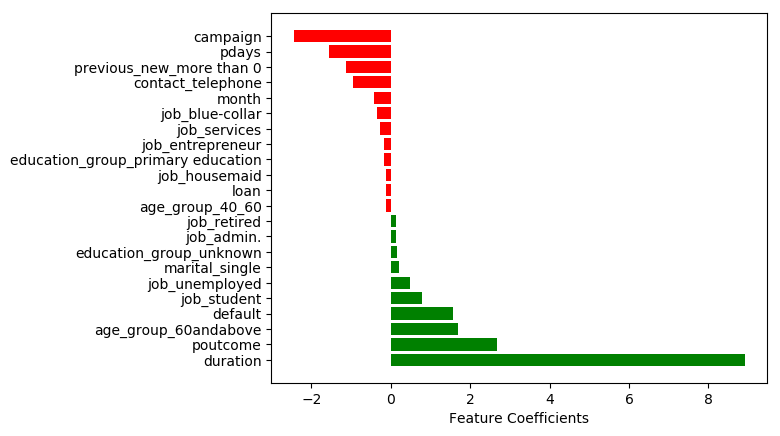

In [186]:
visualize_coefs(coef_dict)

In [187]:
coef_dict

{'campaign': -2.43792584522282,
 'pdays': -1.5515515452433466,
 'previous_new_more than 0': -1.1226905442144708,
 'contact_telephone': -0.9430788242369029,
 'month': -0.4180704947448185,
 'job_blue-collar': -0.35322895241175667,
 'job_services': -0.2751356784377501,
 'job_entrepreneur': -0.17767587371939353,
 'education_group_primary education': -0.16252935393628085,
 'job_housemaid': -0.12347028006321815,
 'loan': -0.12018512067451827,
 'age_group_40_60': -0.10925548591295403,
 'job_retired': 0.12324302998142823,
 'job_admin.': 0.1402117288693197,
 'education_group_unknown': 0.16106384950536978,
 'marital_single': 0.21780249810415744,
 'job_unemployed': 0.4916317579398979,
 'job_student': 0.7846819622836647,
 'default': 1.5764455810027358,
 'age_group_60andabove': 1.6972387043075483,
 'poutcome': 2.6827786610399835,
 'duration': 8.919117546234608}

duration has the most positive effect and campaign has the most negative effect

In [188]:
# Get the coefficents for Class 1, Less Often
coef_dict = get_feature_coefs(l2_model, 0, feature_cols)

<Figure size 2500x2000 with 0 Axes>

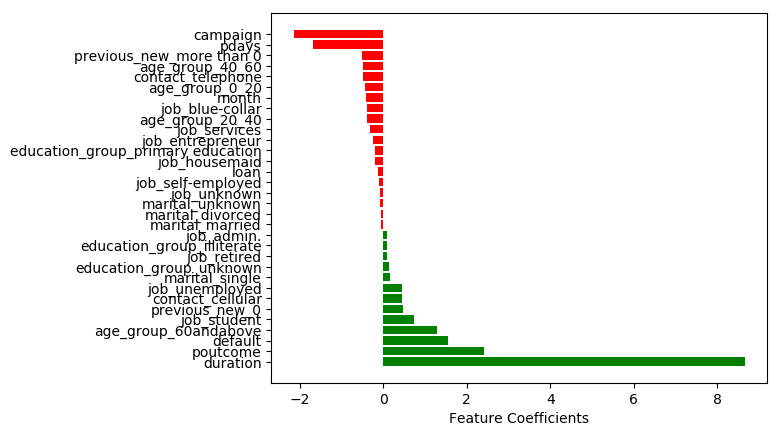

In [189]:
visualize_coefs(coef_dict)

In [190]:
coef_dict

{'campaign': -2.1376255180250676,
 'pdays': -1.687515159257002,
 'previous_new_more than 0': -0.5119409353006263,
 'age_group_40_60': -0.4965700980889088,
 'contact_telephone': -0.48789730084194083,
 'age_group_0_20': -0.4317795804105617,
 'month': -0.4259593433467448,
 'job_blue-collar': -0.40092393688340794,
 'age_group_20_40': -0.38683667198253163,
 'job_services': -0.3259801036358819,
 'job_entrepreneur': -0.23597013834159183,
 'education_group_primary education': -0.20760764374503768,
 'job_housemaid': -0.19169865919438883,
 'loan': -0.13397850548105014,
 'job_self-employed': -0.10000263990374637,
 'job_unknown': -0.08292971916342648,
 'marital_unknown': -0.06786238658067478,
 'marital_divorced': -0.06636729641743257,
 'marital_married': -0.05926239633541944,
 'job_admin.': 0.0913244323135906,
 'education_group_illiterate': 0.09203119725652248,
 'job_retired': 0.09292129716418672,
 'education_group_unknown': 0.12757330763172914,
 'marital_single': 0.1564315680578937,
 'job_unemplo

looks like the feature coefficients are pretty similar to each other with l1 and l2 

## Train KNN Models

In [452]:
# Estimate KNN model and report outcomes
knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      8767
           1       0.49      0.27      0.35      1110

    accuracy                           0.89      9877
   macro avg       0.70      0.62      0.64      9877
weighted avg       0.86      0.89      0.87      9877

Accuracy score:  0.89
F1 Score:  0.35


In [453]:
# # Plot confusion matrix
# sns.set_palette(sns.color_palette())
# _, ax = plt.subplots(figsize=(12,12))
# ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})  
# labels = ['False', 'True']
# ax.set_xticklabels(labels, fontsize=25);
# ax.set_yticklabels(labels[::-1], fontsize=25);
# ax.set_ylabel('Prediction', fontsize=30);
# ax.set_xlabel('Ground Truth', fontsize=30)
# ### END SOLUTION

### finding the best K

In [454]:
### BEGIN SOLUTION
max_k = 40
f1_scores = list()
error_rates = list() # 1-accuracy

for k in range(1, max_k):
    
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_pred, y_test)
    f1_scores.append((k, round(f1_score(y_test, y_pred), 4)))
    error = 1-round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))
    
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

<Figure size 1800x1200 with 0 Axes>

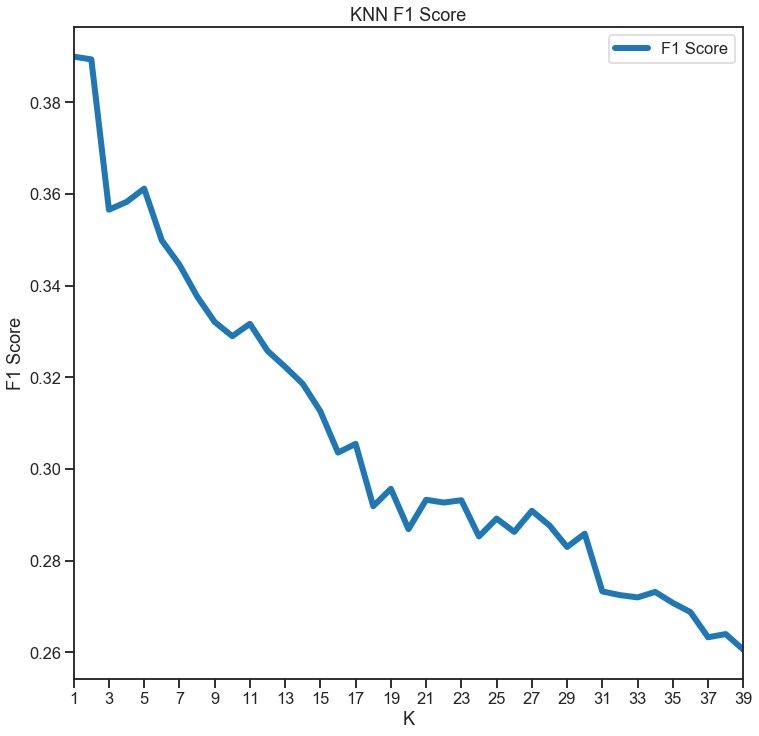

In [455]:
# Plot F1 results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = f1_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.title('KNN F1 Score')
plt.savefig('knn_f1.png')

<Figure size 1800x1200 with 0 Axes>

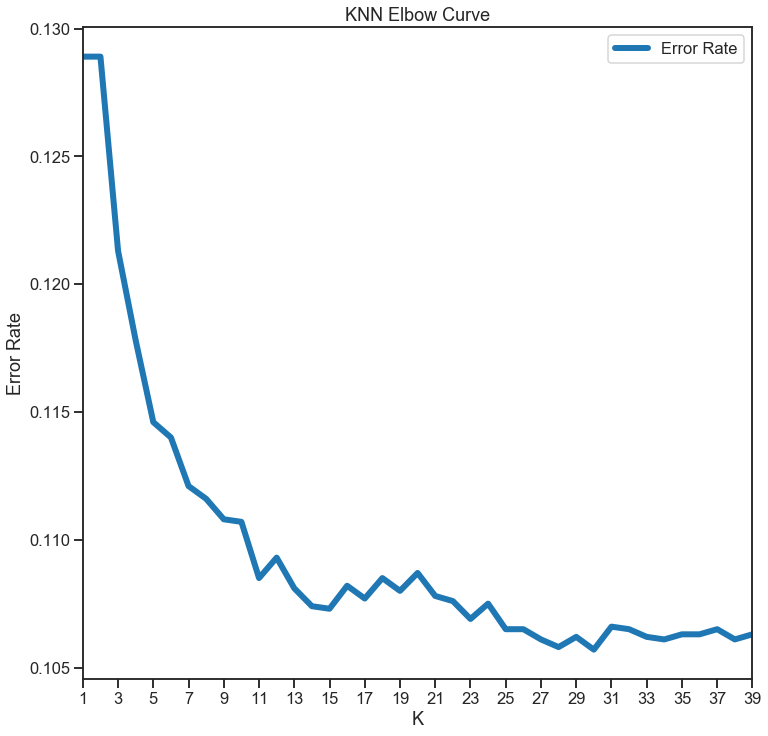

In [456]:
# Plot Accuracy (Error Rate) results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = error_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='Error Rate')
ax.set_xticks(range(1, max_k, 2))
plt.title('KNN Elbow Curve')
plt.savefig('knn_elbow.png')
### END SOLUTION

it looks like the best K is at K=16, lets try again with it

In [464]:
# Estimate KNN model and report outcomes
knn = KNeighborsClassifier(n_neighbors=15)
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      8767
           1       0.63      0.18      0.28      1110

    accuracy                           0.90      9877
   macro avg       0.77      0.58      0.61      9877
weighted avg       0.87      0.90      0.87      9877

Accuracy score:  0.9
F1 Score:  0.28


In [469]:
# y_train_pred_gr = GR.predict(X_train)
# y_test_pred_gr = GR.predict(X_test)

train_test_gr_error = pd.concat([train_test_gr_error,
                                 measure_error(y_test, y_pred, 'test knn best')],
                                axis=1)
train_test_gr_error

,test log reg l2,test log reg l1,test knn best
accuracy,0.909082,0.909082,0.895819
precision,0.692727,0.701521,0.625387
recall,0.343243,0.332432,0.181982
f1,0.459036,0.451100,0.281926


In [468]:
train_test_gr_error= train_test_gr_error.drop('test knn best', axis = 1)

even with it we have terrible recall for class 1

### lets try to deal with the class imbalance and try again

In [459]:
# # Visualize the count for each class
# bank['y'].value_counts().plot.bar(color=['blue', 'red'])

In [460]:
# # Build a simple logistic regression model
# model = LogisticRegression(random_state=rs, 
#                               max_iter = 1000)

# # Train the model
# model.fit(X_train, y_train)
# preds = model.predict(X_test)

In [461]:
# # Calculate the precision, recall, f5 given the y_test and predictions
# # Note that we use beta=5 which means we think the cost of positive class is 5 times of negative class
# # You could try other beta values yourself
# accuracy = accuracy_score(y_test, preds)
# precision, recall, fbeta, support = precision_recall_fscore_support(y_test, preds, beta=5, pos_label=1, average='binary')
# auc = roc_auc_score(y_test, preds)
# print(f"Accuracy is: {accuracy:.2f}")
# print(f"Precision is: {precision:.2f}")
# print(f"Recall is: {recall:.2f}")
# print(f"Fscore is: {fbeta:.2f}")
# print(f"AUC is: {auc:.2f}")

### Synthetic Minority Oversampling Technique (SMOTE)


In [201]:
# !pip install --upgrade 'sklearn.neighbors.base'

In [202]:
# !pip install enum34

In [203]:
# !conda install -c conda-forge imbalanced-learn

In [204]:
# !pip install scikit-learn==0.22.1

In [470]:
from imblearn.over_sampling import SMOTE, RandomOverSampler

In [471]:
# Create a SMOTE sampler
smote_sampler = SMOTE(random_state = rs)

In [511]:
# Resample training data using SMOTE
X_smo, y_smo = smote_sampler.fit_resample(X_train, y_train)

In [473]:
type(y_train)

pandas.core.series.Series

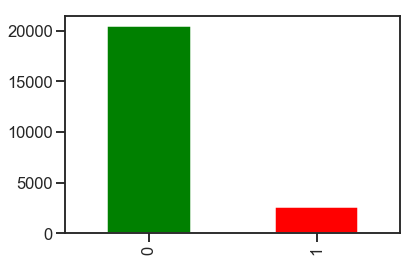

In [474]:
# Visualize classes
y_train.value_counts().plot.bar(color=['green', 'red'])

In [475]:
y_smo_df = pd.DataFrame(y_smo)
# y_smo_df[0]

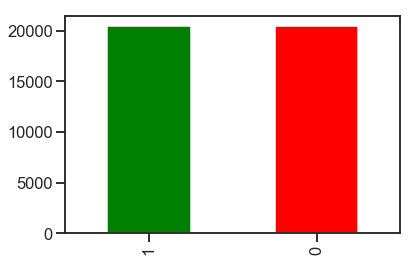

In [476]:
# Visualize classes
y_smo_df[0].value_counts().plot.bar(color=['green', 'red'])

## classifying using smote

In [477]:
knn = knn.fit(X_smo, y_smo)
y_pred = knn.predict(X_test)
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

           0       0.95      0.82      0.88      8767
           1       0.31      0.66      0.42      1110

    accuracy                           0.80      9877
   macro avg       0.63      0.74      0.65      9877
weighted avg       0.88      0.80      0.83      9877

Accuracy score:  0.8
F1 Score:  0.42


In [478]:
# y_train_pred_gr = GR.predict(X_train)
# y_test_pred_gr = GR.predict(X_test)

train_test_gr_error = pd.concat([train_test_gr_error,
                                 measure_error(y_test, y_pred, 'test knn best smote')],
                                axis=1)
train_test_gr_error

,test log reg l2,test log reg l1,test knn best,test knn best smote
accuracy,0.909082,0.909082,0.895819,0.800142
precision,0.692727,0.701521,0.625387,0.313793
recall,0.343243,0.332432,0.181982,0.655856
f1,0.459036,0.451100,0.281926,0.424490


## classifying using class weight

In [499]:
class_weight = {}

# Assign weight of class 0 to be 0.1
class_weight[0] = 0.7

# Assign weight of class 1 to be 0.9
class_weight[1] = 0.3


In [505]:
# Define a logistic regression with weight
l2_model_cw = LogisticRegression(random_state=rs, 
                              max_iter = 1000,
                              class_weight=class_weight, C=0.07, penalty = 'l2', solver = 'saga')

In [503]:
l2_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=47, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [506]:
# Train the model
l2_model_cw.fit(X_train, y_train)
# Make predictions on the test dataset
preds = l2_model_cw.predict(X_test)

In [507]:
print(classification_report(y_test, preds))
print('Accuracy score: ', round(accuracy_score(y_test, preds), 2))
print('F1 Score: ', round(f1_score(y_test, preds), 2))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      8767
           1       0.72      0.19      0.30      1110

    accuracy                           0.90      9877
   macro avg       0.81      0.59      0.62      9877
weighted avg       0.89      0.90      0.87      9877

Accuracy score:  0.9
F1 Score:  0.3


In [508]:
# y_train_pred_gr = GR.predict(X_train)
# y_test_pred_gr = GR.predict(X_test)

train_test_gr_error = pd.concat([train_test_gr_error,
                                 measure_error(y_test, preds, 'test logistic regression class weight')],
                                axis=1)
train_test_gr_error

,test log reg l2,test log reg l1,test knn best,test knn best smote,test logistic regression class weight
accuracy,0.909082,0.909082,0.895819,0.800142,0.900881
precision,0.692727,0.701521,0.625387,0.313793,0.722034
recall,0.343243,0.332432,0.181982,0.655856,0.191892
f1,0.459036,0.451100,0.281926,0.424490,0.303203


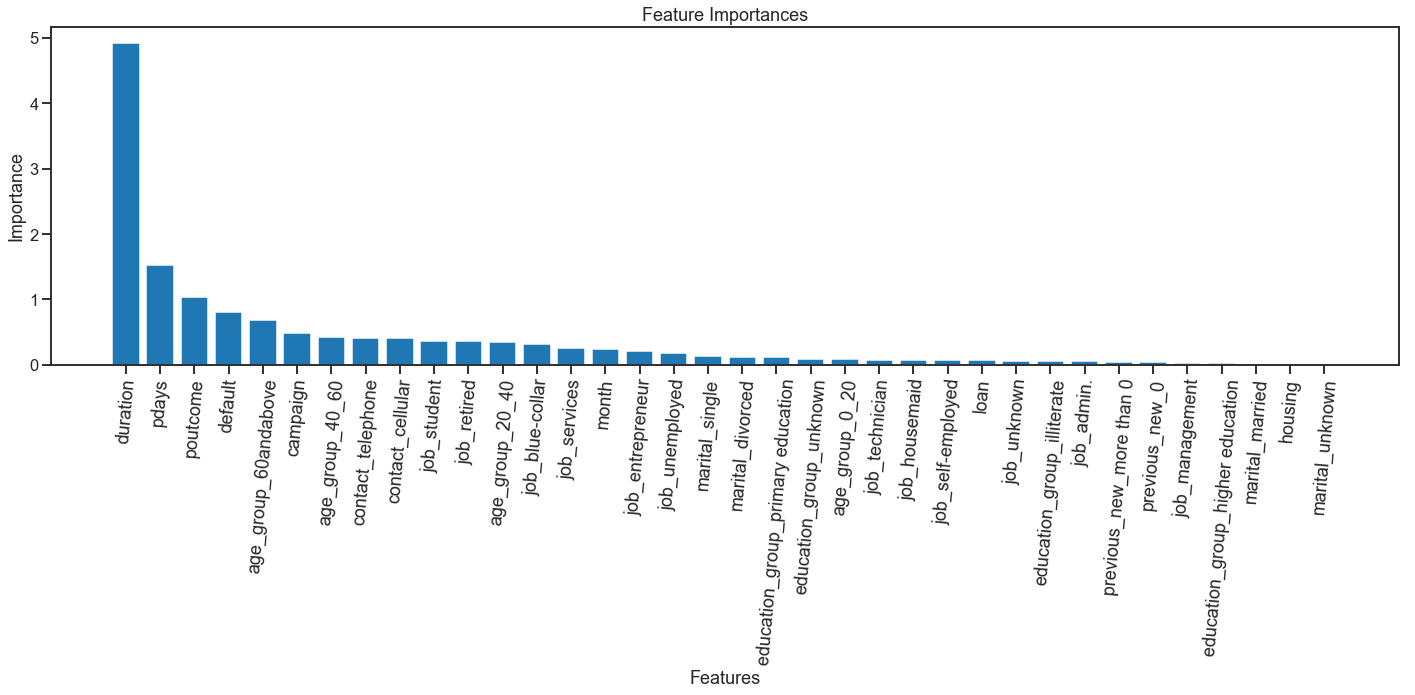

In [509]:
log_feat_imp(l2_model_cw, X.columns)

## using l2 lr

In [513]:
l2_model.fit(X_smo, y_smo)

y_pred_lr_smo = l2_model.predict(X_test)
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred_lr_smo))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred_lr_smo), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred_lr_smo), 2))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91      8767
           1       0.41      0.79      0.54      1110

    accuracy                           0.85      9877
   macro avg       0.69      0.82      0.72      9877
weighted avg       0.91      0.85      0.87      9877

Accuracy score:  0.85
F1 Score:  0.54


In [514]:
# y_train_pred_gr = GR.predict(X_train)
# y_test_pred_gr = GR.predict(X_test)

train_test_gr_error = pd.concat([train_test_gr_error,
                                 measure_error(y_test, y_pred_lr_smo, 'test lr l2 smote')],
                                axis=1)
train_test_gr_error

,test log reg l2,test log reg l1,test knn best,test knn best smote,test logistic regression class weight,test lr l2 smote
accuracy,0.909082,0.909082,0.895819,0.800142,0.900881,0.846917
precision,0.692727,0.701521,0.625387,0.313793,0.722034,0.406858
recall,0.343243,0.332432,0.181982,0.655856,0.191892,0.790991
f1,0.459036,0.451100,0.281926,0.424490,0.303203,0.537332


In [515]:
# Define a logistic regression model with above arguments
l2_model_cw = LogisticRegression(random_state=rs, penalty='l2', multi_class=multi_class, solver=solver, max_iter = 1000,  class_weight=class_weight)

In [516]:
# Train the model
l2_model_cw.fit(X_train, y_train)
# Make predictions on the test dataset
preds_lr_cw = l2_model_cw.predict(X_test)

In [517]:
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, preds_lr_cw))
print('Accuracy score: ', round(accuracy_score(y_test, preds_lr_cw), 2))
print('F1 Score: ', round(f1_score(y_test, preds_lr_cw), 2))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      8767
           1       0.69      0.33      0.45      1110

    accuracy                           0.91      9877
   macro avg       0.81      0.66      0.70      9877
weighted avg       0.90      0.91      0.89      9877

Accuracy score:  0.91
F1 Score:  0.45


In [518]:
# y_train_pred_gr = GR.predict(X_train)
# y_test_pred_gr = GR.predict(X_test)

train_test_gr_error = pd.concat([train_test_gr_error,
                                 measure_error(y_test, preds_lr_cw, 'test lr l2 class weight')],
                                axis=1)
train_test_gr_error

,test log reg l2,test log reg l1,test knn best,test knn best smote,test logistic regression class weight,test lr l2 smote,test lr l2 class weight
accuracy,0.909082,0.909082,0.895819,0.800142,0.900881,0.846917,0.908373
precision,0.692727,0.701521,0.625387,0.313793,0.722034,0.406858,0.694497
recall,0.343243,0.332432,0.181982,0.655856,0.191892,0.790991,0.329730
f1,0.459036,0.451100,0.281926,0.424490,0.303203,0.537332,0.447159


precision went down but recall and f1 score went up

## Train with Support vector Machines

In [519]:
params_grid = {
    'C': [1, 10, 100],
    'kernel': ['poly', 'rbf', 'sigmoid']
}

In [520]:
model = SVC()

In [521]:
# Define a GridSearchCV to search the best parameters
grid_search = GridSearchCV(estimator = model, 
                           param_grid = params_grid, 
                           scoring='f1',
                           cv = 5, verbose = 1)
# Search the best parameters with training data
grid_search.fit(X_train, y_train.values.ravel())
best_params = grid_search.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 16.2min finished


In [522]:
best_params

{'C': 100, 'kernel': 'rbf'}

In [526]:
model = SVC(C=100, kernel='rbf')
model.fit(X_train, y_train.values.ravel())
preds = model.predict(X_test)
evaluate_metrics(y_test, preds)

{'accuracy': 0.8983497013263136,
 'recall': array([0.97638873, 0.28198198]),
 'precision': array([0.91482313, 0.60192308]),
 'f1score': array([0.94460384, 0.38404908])}

In [527]:
# y_train_pred_gr = GR.predict(X_train)
# y_test_pred_gr = GR.predict(X_test)

train_test_gr_error = pd.concat([train_test_gr_error,
                                 measure_error(y_test, preds, 'test svm best')],
                                axis=1)
train_test_gr_error

,test log reg l2,test log reg l1,test knn best,test knn best smote,test logistic regression class weight,test lr l2 smote,test lr l2 class weight,test svm best
accuracy,0.909082,0.909082,0.895819,0.800142,0.900881,0.846917,0.908373,0.898350
precision,0.692727,0.701521,0.625387,0.313793,0.722034,0.406858,0.694497,0.601923
recall,0.343243,0.332432,0.181982,0.655856,0.191892,0.790991,0.329730,0.281982
f1,0.459036,0.451100,0.281926,0.424490,0.303203,0.537332,0.447159,0.384049


In [532]:
model_svc_smo = SVC(C=100, kernel='rbf' )
model_svc_smo.fit(X_smo, y_smo.ravel())
preds_svc_smo = model_svc_smo.predict(X_test)
evaluate_metrics(y_test, preds_svc_smo)

{'accuracy': 0.8432722486584996,
 'recall': array([0.86574655, 0.66576577]),
 'precision': array([0.95339781, 0.38569937]),
 'f1score': array([0.90746055, 0.48843358])}

In [533]:
model_svc_CW = SVC(C=100, kernel='rbf', class_weight = class_weight )
model_svc_CW.fit(X_train, y_train.values.ravel())
preds_svc_CW = model_svc_CW.predict(X_test)
evaluate_metrics(y_test, preds_svc_CW)

{'accuracy': 0.9004758529917991,
 'recall': array([0.98026691, 0.27027027]),
 'precision': array([0.91386644, 0.63424947]),
 'f1score': array([0.94590281, 0.37902716])}

In [534]:
train_test_gr_error = pd.concat([train_test_gr_error,
                                 measure_error(y_test, preds_svc_smo, 'test svm best SMOTE')],
                                axis=1)
train_test_gr_error

,test log reg l2,test log reg l1,test knn best,test knn best smote,test logistic regression class weight,test lr l2 smote,test lr l2 class weight,test svm best,test svm best SMOTE
accuracy,0.909082,0.909082,0.895819,0.800142,0.900881,0.846917,0.908373,0.898350,0.843272
precision,0.692727,0.701521,0.625387,0.313793,0.722034,0.406858,0.694497,0.601923,0.385699
recall,0.343243,0.332432,0.181982,0.655856,0.191892,0.790991,0.329730,0.281982,0.665766
f1,0.459036,0.451100,0.281926,0.424490,0.303203,0.537332,0.447159,0.384049,0.488434


In [535]:
train_test_gr_error = pd.concat([train_test_gr_error,
                                 measure_error(y_test, preds_svc_CW, 'test svm best CW')],
                                axis=1)
train_test_gr_error

,test log reg l2,test log reg l1,test knn best,test knn best smote,test logistic regression class weight,test lr l2 smote,test lr l2 class weight,test svm best,test svm best SMOTE,test svm best CW
accuracy,0.909082,0.909082,0.895819,0.800142,0.900881,0.846917,0.908373,0.898350,0.843272,0.900476
precision,0.692727,0.701521,0.625387,0.313793,0.722034,0.406858,0.694497,0.601923,0.385699,0.634249
recall,0.343243,0.332432,0.181982,0.655856,0.191892,0.790991,0.329730,0.281982,0.665766,0.270270
f1,0.459036,0.451100,0.281926,0.424490,0.303203,0.537332,0.447159,0.384049,0.488434,0.379027


## Training with Decision trees

In [536]:
### BEGIN SOLUTION
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)

In [537]:
dt.tree_.node_count, dt.tree_.max_depth

(4945, 32)

In [538]:
### BEGIN SOLUTION
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt.feature_importances_)+1)}

GR = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=-1)

GR = GR.fit(X_train, y_train)

In [539]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)

In [540]:
# The error on the training and test data sets
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error
### END SOLUTION

,train,test
accuracy,0.999783,0.875266
precision,1.000000,0.446864
recall,0.998070,0.462162
f1,0.999034,0.454384


In [541]:
### BEGIN SOLUTION
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt.feature_importances_)+1)}

GR = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=-1)

GR = GR.fit(X_train, y_train)

In [542]:
GR.best_estimator_.tree_.node_count, GR.best_estimator_.tree_.max_depth

(59, 5)

In [551]:
GR.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=35, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [545]:
# y_train_pred_gr = GR.predict(X_train)
y_test_pred_gr = GR.predict(X_test)

# train_test_gr_error = pd.concat([measure_error(y_train, y_train_pred_gr, 'train'),
#                                  measure_error(y_test, y_test_pred_gr, 'test')],
#                                 axis=1)

In [546]:
# y_train_pred_gr = GR.predict(X_train)
# y_test_pred_gr = GR.predict(X_test)

train_test_gr_error = pd.concat([train_test_gr_error,
                                 measure_error(y_test, y_test_pred_gr, 'test decision tree best')],
                                axis=1)
train_test_gr_error

,test log reg l2,test log reg l1,test knn best,test knn best smote,test logistic regression class weight,test lr l2 smote,test lr l2 class weight,test svm best,test svm best SMOTE,test svm best CW,test decision tree best
accuracy,0.909082,0.909082,0.895819,0.800142,0.900881,0.846917,0.908373,0.898350,0.843272,0.900476,0.908778
precision,0.692727,0.701521,0.625387,0.313793,0.722034,0.406858,0.694497,0.601923,0.385699,0.634249,0.653001
recall,0.343243,0.332432,0.181982,0.655856,0.191892,0.790991,0.329730,0.281982,0.665766,0.270270,0.401802
f1,0.459036,0.451100,0.281926,0.424490,0.303203,0.537332,0.447159,0.384049,0.488434,0.379027,0.497490


### DECISION TREES USING smote and class weight

In [577]:
bst_dt = DecisionTreeClassifier(random_state=42,
                       max_depth=5, max_features=35)
dt_smo = bst_dt.fit(X_smo, y_smo)

In [578]:
dt_smo_pred = dt_smo.predict(X_test)
train_test_gr_error = pd.concat([train_test_gr_error,
                                 measure_error(y_test, dt_smo_pred, 'test decision tree best SMOTE')],
                                axis=1)
train_test_gr_error

,test log reg l2,test log reg l1,test knn best,test knn best smote,test logistic regression class weight,test lr l2 smote,test lr l2 class weight,test svm best,test svm best SMOTE,test svm best CW,test decision tree best,test decision tree best CW,test decision tree best CW SMOTE,test decision tree best SMOTE
accuracy,0.909082,0.909082,0.895819,0.800142,0.900881,0.846917,0.908373,0.898350,0.843272,0.900476,0.908778,0.908778,0.762681,0.762681
precision,0.692727,0.701521,0.625387,0.313793,0.722034,0.406858,0.694497,0.601923,0.385699,0.634249,0.653001,0.653001,0.304251,0.304251
recall,0.343243,0.332432,0.181982,0.655856,0.191892,0.790991,0.329730,0.281982,0.665766,0.270270,0.401802,0.401802,0.863964,0.863964
f1,0.459036,0.451100,0.281926,0.424490,0.303203,0.537332,0.447159,0.384049,0.488434,0.379027,0.497490,0.497490,0.450023,0.450023


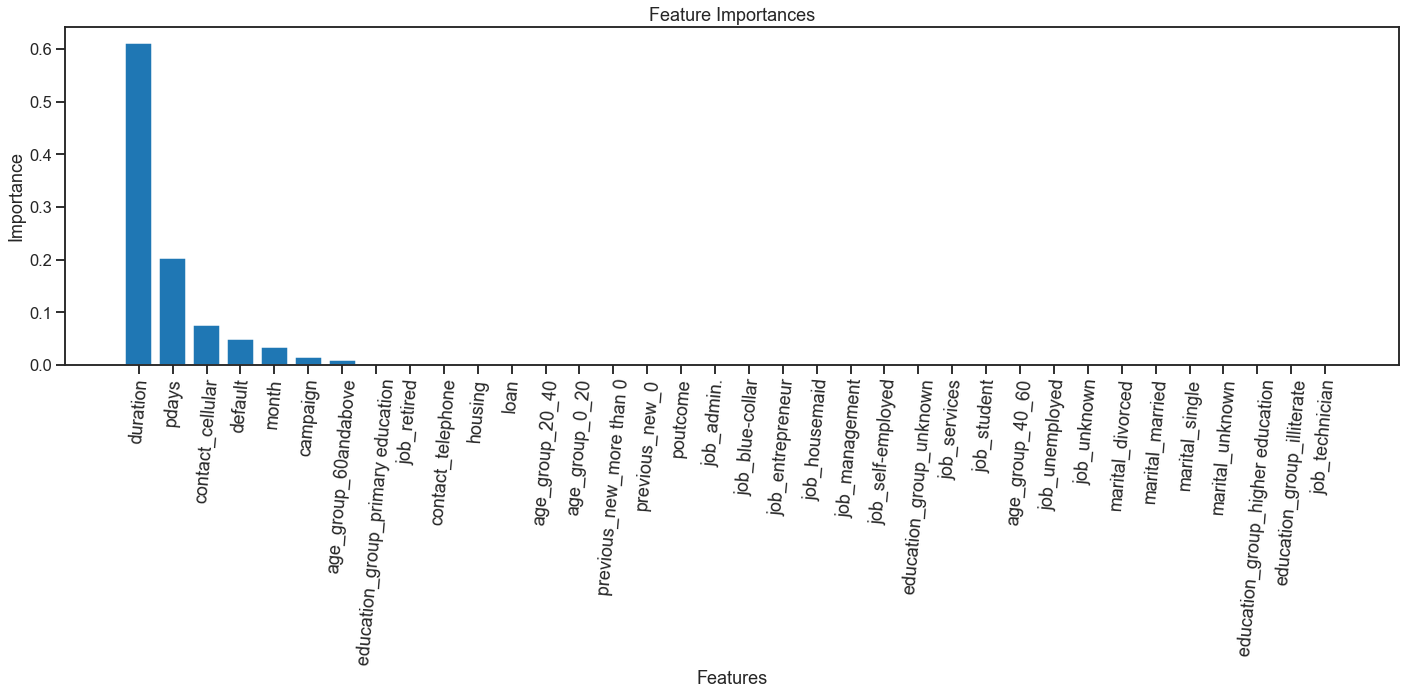

In [562]:
log_feat_imp(dt_smo, X.columns, 'dt')

In [566]:
class_weight

{0: 0.5, 1: 0.5}

In [596]:
bst_dt_cw = DecisionTreeClassifier(random_state=42,
                       max_depth=5, max_features=35, class_weight = {0: 0.7, 1: 0.3})
dt_cw = bst_dt_cw.fit(X_train, y_train)

In [598]:
dt_cw_pred = dt_cw.predict(X_test)
measure_error(y_test, dt_cw_pred, 'test decision tree best CW')
train_test_gr_error = train_test_gr_error.drop('test decision tree best CW',axis = 1)
train_test_gr_error = pd.concat([train_test_gr_error,
                                 measure_error(y_test, dt_cw_pred, 'test decision tree best CW')],
                                axis=1)
train_test_gr_error

,test log reg l2,test log reg l1,test knn best,test knn best smote,test logistic regression class weight,test lr l2 smote,test lr l2 class weight,test svm best,test svm best SMOTE,test svm best CW,test decision tree best,test decision tree best CW SMOTE,test decision tree best SMOTE,test decision tree best CW
accuracy,0.909082,0.909082,0.895819,0.800142,0.900881,0.846917,0.908373,0.898350,0.843272,0.900476,0.908778,0.762681,0.762681,0.900172
precision,0.692727,0.701521,0.625387,0.313793,0.722034,0.406858,0.694497,0.601923,0.385699,0.634249,0.653001,0.304251,0.304251,0.754098
recall,0.343243,0.332432,0.181982,0.655856,0.191892,0.790991,0.329730,0.281982,0.665766,0.270270,0.401802,0.863964,0.863964,0.165766
f1,0.459036,0.451100,0.281926,0.424490,0.303203,0.537332,0.447159,0.384049,0.488434,0.379027,0.497490,0.450023,0.450023,0.271787


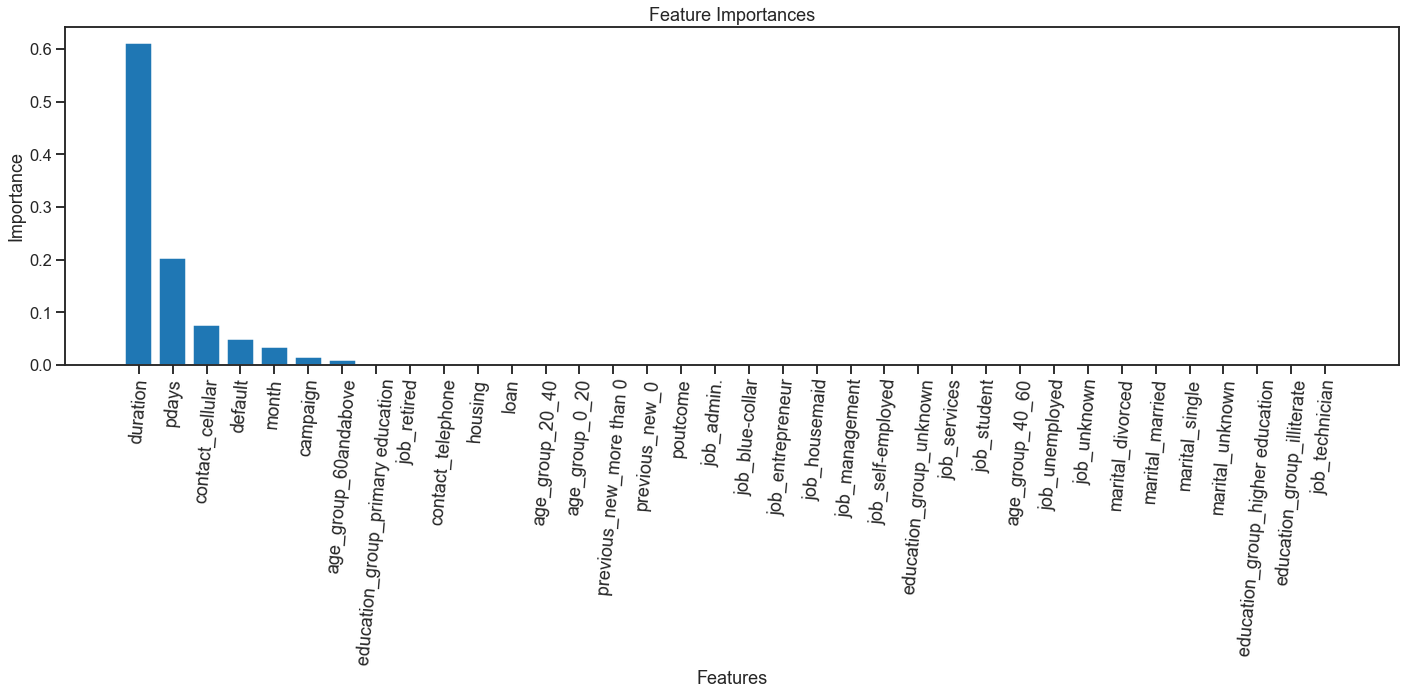

In [574]:
log_feat_imp(dt_cw, X.columns, 'dt')

In [586]:
bst_dt_cw = DecisionTreeClassifier(random_state=42,
                       max_depth=5, max_features=35, class_weight = {0: 0.5, 1: 0.5})
dt_cw = bst_dt_cw.fit(X_smo, y_smo)

In [587]:
dt_cw_pred = dt_cw.predict(X_test)
measure_error(y_test, dt_cw_pred, 'test decision tree best CW SMOTE')
# train_test_gr_error = pd.concat([train_test_gr_error,
#                                  measure_error(y_test, dt_cw_pred, 'test decision tree best CW SMOTE')],
#                                 axis=1)
# train_test_gr_error

accuracy     0.762681
precision    0.304251
recall       0.863964
f1           0.450023
Name: test decision tree best CW SMOTE, dtype: float64

In [576]:
# train_test_gr_error = train_test_gr_error.drop('test decision tree best SMOTE', axis = 1)
train_test_gr_error

,test log reg l2,test log reg l1,test knn best,test knn best smote,test logistic regression class weight,test lr l2 smote,test lr l2 class weight,test svm best,test svm best SMOTE,test svm best CW,test decision tree best,test decision tree best CW,test decision tree best CW SMOTE
accuracy,0.909082,0.909082,0.895819,0.800142,0.900881,0.846917,0.908373,0.898350,0.843272,0.900476,0.908778,0.908778,0.762681
precision,0.692727,0.701521,0.625387,0.313793,0.722034,0.406858,0.694497,0.601923,0.385699,0.634249,0.653001,0.653001,0.304251
recall,0.343243,0.332432,0.181982,0.655856,0.191892,0.790991,0.329730,0.281982,0.665766,0.270270,0.401802,0.401802,0.863964
f1,0.459036,0.451100,0.281926,0.424490,0.303203,0.537332,0.447159,0.384049,0.488434,0.379027,0.497490,0.497490,0.450023


with decision trees it has the best precission recall compared to SVM and lOGISTIC REGRESSION

### Train with Random Forest

In [599]:
model = RandomForestClassifier()
model.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [600]:
param_grid = {'n_estimators': [2*n+1 for n in range(20)],
             'max_depth' : [2*n+1 for n in range(10) ],
             'max_features':["auto", "sqrt", "log2"]}


In [601]:
search = GridSearchCV(estimator=model, param_grid=param_grid,scoring='accuracy')
search.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [602]:
search.best_score_

0.9074379968389141

In [603]:
search.best_params_

{'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 21}

In [607]:
def get_accuracy(X_train, X_test, y_train, y_test, model):
    return  {"test Accuracy":metrics.accuracy_score(y_test, model.predict(X_test)),"trian Accuracy": metrics.accuracy_score(y_train, model.predict(X_train))}

In [608]:

print(get_accuracy(X_train, X_test, y_train, y_test, search.best_estimator_))

{'test Accuracy': 0.9049306469575782, 'trian Accuracy': 0.9524388127061274}


In [625]:
rf = RandomForestClassifier(max_depth= 15, max_features= 'sqrt', n_estimators= 21)
rf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [626]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=21,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [627]:
rf_pred = rf.predict(X_test)

In [628]:
measure_error(y_test, rf_pred, 'test random forest best')

accuracy     0.904222
precision    0.638047
recall       0.341441
f1           0.444836
Name: test random forest best, dtype: float64

In [612]:
train_test_gr_error = pd.concat([train_test_gr_error,
                                 measure_error(y_test, rf_pred, 'test random forest best')],
                                axis=1)
train_test_gr_error

,test log reg l2,test log reg l1,test knn best,test knn best smote,test logistic regression class weight,test lr l2 smote,test lr l2 class weight,test svm best,test svm best SMOTE,test svm best CW,test decision tree best,test decision tree best CW SMOTE,test decision tree best SMOTE,test decision tree best CW,test random forest best
accuracy,0.909082,0.909082,0.895819,0.800142,0.900881,0.846917,0.908373,0.898350,0.843272,0.900476,0.908778,0.762681,0.762681,0.900172,0.904728
precision,0.692727,0.701521,0.625387,0.313793,0.722034,0.406858,0.694497,0.601923,0.385699,0.634249,0.653001,0.304251,0.304251,0.754098,0.636953
recall,0.343243,0.332432,0.181982,0.655856,0.191892,0.790991,0.329730,0.281982,0.665766,0.270270,0.401802,0.863964,0.863964,0.165766,0.354054
f1,0.459036,0.451100,0.281926,0.424490,0.303203,0.537332,0.447159,0.384049,0.488434,0.379027,0.497490,0.450023,0.450023,0.271787,0.455124


## rf using smote

In [629]:
rf.fit(X_smo, y_smo)
rf_pred_smo = rf.predict(X_test)
measure_error(y_test, rf_pred_smo, 'test random forest best')

accuracy     0.870406
precision    0.451037
recall       0.705405
f1           0.550246
Name: test random forest best, dtype: float64

In [630]:
train_test_gr_error = pd.concat([train_test_gr_error,
                                 measure_error(y_test, rf_pred_smo, 'test random forest best smote')],
                                axis=1)
train_test_gr_error

,test log reg l2,test log reg l1,test knn best,test knn best smote,test logistic regression class weight,test lr l2 smote,test lr l2 class weight,test svm best,test svm best SMOTE,test svm best CW,test decision tree best,test decision tree best CW SMOTE,test decision tree best SMOTE,test decision tree best CW,test random forest best,test random forest best smote
accuracy,0.909082,0.909082,0.895819,0.800142,0.900881,0.846917,0.908373,0.898350,0.843272,0.900476,0.908778,0.762681,0.762681,0.900172,0.904728,0.870406
precision,0.692727,0.701521,0.625387,0.313793,0.722034,0.406858,0.694497,0.601923,0.385699,0.634249,0.653001,0.304251,0.304251,0.754098,0.636953,0.451037
recall,0.343243,0.332432,0.181982,0.655856,0.191892,0.790991,0.329730,0.281982,0.665766,0.270270,0.401802,0.863964,0.863964,0.165766,0.354054,0.705405
f1,0.459036,0.451100,0.281926,0.424490,0.303203,0.537332,0.447159,0.384049,0.488434,0.379027,0.497490,0.450023,0.450023,0.271787,0.455124,0.550246


### rf using class weights

In [650]:
rf_cw = RandomForestClassifier(max_depth= 15, max_features= 'sqrt', n_estimators= 21, class_weight= {0: 0.12, 1: 0.88})
rf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [651]:
rf_cw.fit(X_train, y_train)
rf_pred_cw = rf_cw.predict(X_test)
measure_error(y_test, rf_pred_cw, 'test random forest best cw')

accuracy     0.870710
precision    0.450386
recall       0.682883
f1           0.542786
Name: test random forest best cw, dtype: float64

In [649]:
y_train.value_counts()

0    20453
1     2591
Name: y, dtype: int64

In [652]:
y_test.value_counts()

0    8767
1    1110
Name: y, dtype: int64

In [653]:
train_test_gr_error = pd.concat([train_test_gr_error,
                                 measure_error(y_test, rf_pred_cw, 'test random forest best cw')],
                                axis=1)
train_test_gr_error

,test log reg l2,test log reg l1,test knn best,test knn best smote,test logistic regression class weight,test lr l2 smote,test lr l2 class weight,test svm best,test svm best SMOTE,test svm best CW,test decision tree best,test decision tree best CW SMOTE,test decision tree best SMOTE,test decision tree best CW,test random forest best,test random forest best smote,test random forest best cw
accuracy,0.909082,0.909082,0.895819,0.800142,0.900881,0.846917,0.908373,0.898350,0.843272,0.900476,0.908778,0.762681,0.762681,0.900172,0.904728,0.870406,0.870710
precision,0.692727,0.701521,0.625387,0.313793,0.722034,0.406858,0.694497,0.601923,0.385699,0.634249,0.653001,0.304251,0.304251,0.754098,0.636953,0.451037,0.450386
recall,0.343243,0.332432,0.181982,0.655856,0.191892,0.790991,0.329730,0.281982,0.665766,0.270270,0.401802,0.863964,0.863964,0.165766,0.354054,0.705405,0.682883
f1,0.459036,0.451100,0.281926,0.424490,0.303203,0.537332,0.447159,0.384049,0.488434,0.379027,0.497490,0.450023,0.450023,0.271787,0.455124,0.550246,0.542786


# Key findings and informations

In [656]:
def visualize_eval_metrics(results):
#     df = pd.DataFrame(data=results)
    df = results
    #table = pd.pivot_table(df, values='type', index=['accuracy', 'precision', 'recall', 'f1', 'auc'],
    #                columns=['type'])
    #df = df.set_index('type').transpose()
    print(df)
    x = np.arange(5)
    original = df.iloc[0, 1:].values
    class_weight = df.iloc[1, 1:].values
    smote = df.iloc[2, 1:].values
    under = df.iloc[3, 1:].values
    width = 0.2
    figure = plt.figure(figsize=(12, 10), dpi=80)
    plt.bar(x-0.2, original, width, color='#95a5a6')
    plt.bar(x, class_weight, width, color='#d35400')
    plt.bar(x+0.2, smote, width, color='#2980b9')
    plt.bar(x+0.4, under, width, color='#3498db')
    plt.xticks(x, ['Accuracy', 'Recall', 'AUC', 'Precision', 'Fscore'])
    plt.xlabel("Evaluation Metrics")
    plt.ylabel("Score")
    plt.legend(["Original", "Class Weight", "SMOTE", "Undersampling"])
    plt.show()

           test log reg l2  test log reg l1  test knn best  \
accuracy          0.909082         0.909082       0.895819   
precision         0.692727         0.701521       0.625387   
recall            0.343243         0.332432       0.181982   
f1                0.459036         0.451100       0.281926   

           test knn best smote  test logistic regression class weight  \
accuracy              0.800142                               0.900881   
precision             0.313793                               0.722034   
recall                0.655856                               0.191892   
f1                    0.424490                               0.303203   

           test lr l2 smote  test lr l2 class weight  test svm best  \
accuracy           0.846917                 0.908373       0.898350   
precision          0.406858                 0.694497       0.601923   
recall             0.790991                 0.329730       0.281982   
f1                 0.537332            

ValueError: shape mismatch: objects cannot be broadcast to a single shape

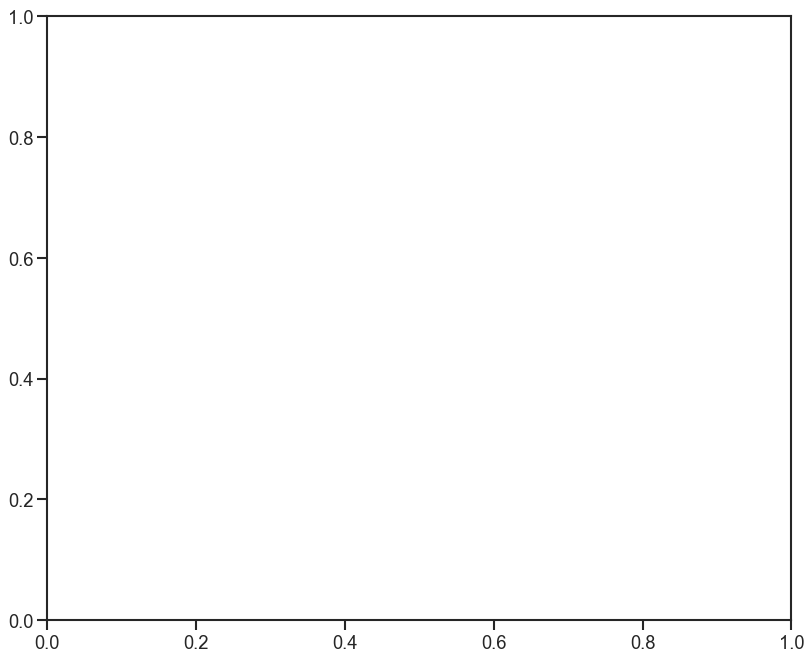

In [657]:
visualize_eval_metrics(train_test_gr_error)

In [658]:
train_test_gr_error

,test log reg l2,test log reg l1,test knn best,test knn best smote,test logistic regression class weight,test lr l2 smote,test lr l2 class weight,test svm best,test svm best SMOTE,test svm best CW,test decision tree best,test decision tree best CW SMOTE,test decision tree best SMOTE,test decision tree best CW,test random forest best,test random forest best smote,test random forest best cw
accuracy,0.909082,0.909082,0.895819,0.800142,0.900881,0.846917,0.908373,0.898350,0.843272,0.900476,0.908778,0.762681,0.762681,0.900172,0.904728,0.870406,0.870710
precision,0.692727,0.701521,0.625387,0.313793,0.722034,0.406858,0.694497,0.601923,0.385699,0.634249,0.653001,0.304251,0.304251,0.754098,0.636953,0.451037,0.450386
recall,0.343243,0.332432,0.181982,0.655856,0.191892,0.790991,0.329730,0.281982,0.665766,0.270270,0.401802,0.863964,0.863964,0.165766,0.354054,0.705405,0.682883
f1,0.459036,0.451100,0.281926,0.424490,0.303203,0.537332,0.447159,0.384049,0.488434,0.379027,0.497490,0.450023,0.450023,0.271787,0.455124,0.550246,0.542786


In [668]:
columns = ['LR W L2', 'LR W L1', 'KNN GR BST','KNN SMOTE', 'LR CLS WGHT', 'LR L2 SMOTE', 'LR L2 CLS WGHT', 'SVM GR BST', 'SVM SMOTE', 'SVM CLS WGHT', 'DT GR BST', 'DT CW SMOTE', 'DT SMOTE', 'DT CW', 'RF GR BST', 'RF SMOTE', 'RF CW']

In [669]:
train_test_gr_error.columns = columns
train_test_gr_error

,LR W L2,LR W L1,KNN GR BST,KNN SMOTE,LR CLS WGHT,LR L2 SMOTE,LR L2 CLS WGHT,SVM GR BST,SVM SMOTE,SVM CLS WGHT,DT GR BST,DT CW SMOTE,DT SMOTE,DT CW,RF GR BST,RF SMOTE,RF CW
accuracy,0.909082,0.909082,0.895819,0.800142,0.900881,0.846917,0.908373,0.898350,0.843272,0.900476,0.908778,0.762681,0.762681,0.900172,0.904728,0.870406,0.870710
precision,0.692727,0.701521,0.625387,0.313793,0.722034,0.406858,0.694497,0.601923,0.385699,0.634249,0.653001,0.304251,0.304251,0.754098,0.636953,0.451037,0.450386
recall,0.343243,0.332432,0.181982,0.655856,0.191892,0.790991,0.329730,0.281982,0.665766,0.270270,0.401802,0.863964,0.863964,0.165766,0.354054,0.705405,0.682883
f1,0.459036,0.451100,0.281926,0.424490,0.303203,0.537332,0.447159,0.384049,0.488434,0.379027,0.497490,0.450023,0.450023,0.271787,0.455124,0.550246,0.542786


In [670]:
metrics_df = train_test_gr_error.transpose()
metrics_df

,accuracy,precision,recall,f1
LR W L2,0.909082,0.692727,0.343243,0.459036
LR W L1,0.909082,0.701521,0.332432,0.451100
KNN GR BST,0.895819,0.625387,0.181982,0.281926
KNN SMOTE,0.800142,0.313793,0.655856,0.424490
LR CLS WGHT,0.900881,0.722034,0.191892,0.303203
LR L2 SMOTE,0.846917,0.406858,0.790991,0.537332
LR L2 CLS WGHT,0.908373,0.694497,0.329730,0.447159
SVM GR BST,0.898350,0.601923,0.281982,0.384049
SVM SMOTE,0.843272,0.385699,0.665766,0.488434
SVM CLS WGHT,0.900476,0.634249,0.270270,0.379027


In [671]:
# plt.bar(metrics_df.index,metrics_df.accuracy)

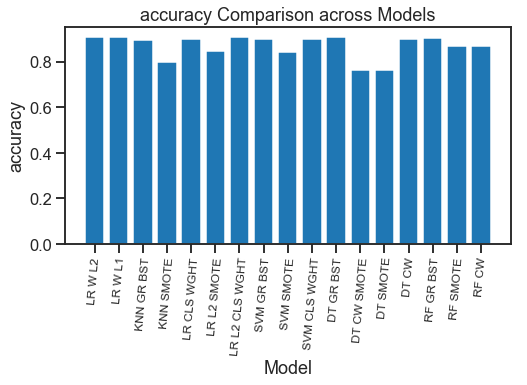

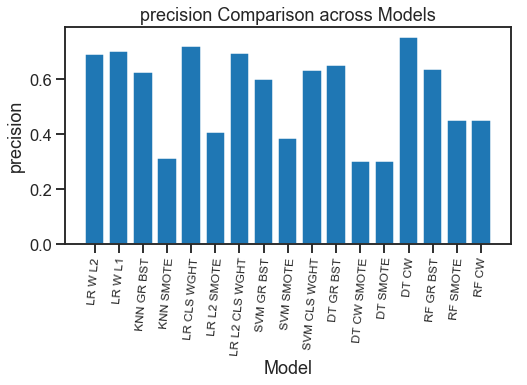

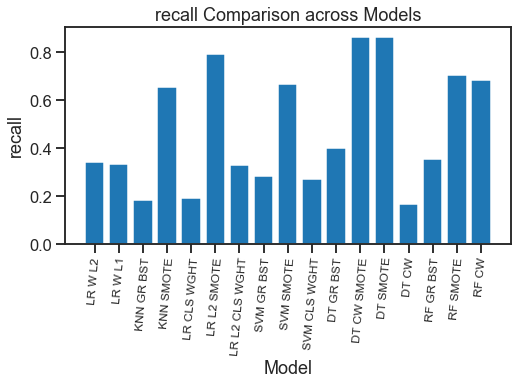

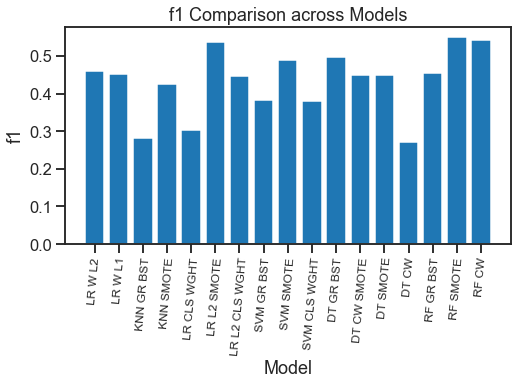

In [679]:

cols = metrics_df.columns

bar_width = 0.4  # Set the desired width of the bars


for col in cols:
    plt.figure(figsize=(8, 4))
    plt.bar(metrics_df.index, metrics_df[col])
    plt.xlabel('Model')
    plt.ylabel(col)
    plt.title(f'{col} Comparison across Models')
    plt.xticks(rotation=85, fontsize = 12)
    plt.show()

overall it can be observed from all the models
* accuracy - was in the range of 90% overall for all the models
* Precision - was the highest with log regression with l2 regression, followed by random forest
* Recall - Recall was suffering the most with the data set being highly imbalanced, the best recall we got was from Random forest
* Overall f1 score was the highest with Random Forest

The strongest predictor was Duration being the driving feature in all our models followed by campaign and months

Some of our feature engineered features with age group 60 and above also turned out to be an important feature

### Lime

In [662]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    # Set the training dataset to be X_test.values (2-D Numpy array)
    training_data=X_test.values,
    # Set the mode to be classification
    mode='classification',
    # Set class names to be `Not Changing` and `Changing`
    class_names = ['Not going for long term deposit', 'yea for long term deposit'],
    # Set feature names
    feature_names=list(X_train.columns),
    random_state=123,
    verbose=True)

In [705]:
instance_index = 6
selected_instance = X_test.iloc[[instance_index]]
lime_test_instance = selected_instance.values.reshape(-1)
selected_instance

,default,housing,loan,month,duration,campaign,pdays,poutcome,job_admin.,job_blue-collar,...,education_group_primary education,education_group_unknown,contact_cellular,contact_telephone,previous_new_0,previous_new_more than 0,age_group_0_20,age_group_20_40,age_group_40_60,age_group_60andabove
5213,0.5,1.0,0.5,0.111111,0.163688,0.0,0.230769,1.0,1,0,...,0,1,0,1,0,1,0,0,1,0


In [706]:
y_test.iloc[[instance_index]]
# indexes = np.where(y_test == 1)[0]
# indexes

5213    1
Name: y, dtype: int32

Intercept 0.3941712879321601
Prediction_local [0.91069602]
Right: 0.8919915005828652


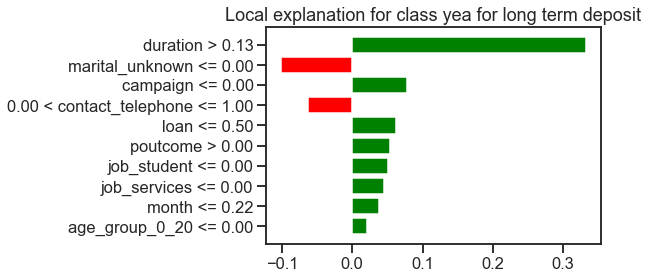

In [707]:
exp = explainer.explain_instance(
                                 # Instance to explain
                                 lime_test_instance, 
                                 # The prediction from black-box model
                                 rf.predict_proba,
                                 # Use max 10 features
                                 num_features=10)
exp.as_pyplot_figure();

like it can be observed here for a random sample that duration is the most positvely driven metric followed by age group 60 and above being the next driving metric

In [302]:
# # Plot line plot
# metrics_df.transpose().plot(kind='line', marker='o', figsize=(10, 6))
# plt.xlabel('Model')
# plt.ylabel('Score')
# plt.title('Performance Metrics over Models')
# plt.legend(title='Metrics')
# plt.xticks(rotation=45)
# plt.show()

## Next Steps

Since the data set was hightly imbalance therefore it was hard to get a good recall and good F1 score I want to retrain the models and try again using misbalancing techniques

I would also like to see how does boosting algorithms do with the dataset